In [2]:
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx


import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

In [2]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm_5.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm_5.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm_5.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm_5.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm_5.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm_5.csv')

In [104]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')

In [3]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm_1p5.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm_1p5.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm_1p5.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm_1p5.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm_1p5.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm_1p5.csv')

In [3]:
muscle_list = ('b1_l', 'b2_l', 'b3_l', 'i1_l', 'i2_l', 'iii1_l', 'iii3_l', 'hg1_l', 'hg2_l', 'hg3_l', 'hg4_l', 'b1_r', 'b2_r', 'b3_r', 'i1_r', 'i2_r', 'iii1_r', 'iii3_r', 'hg1_r', 'hg2_r', 'hg3_r', 'hg4_r')

In [5]:
reflected_muscle_list =('b1_r', 'b2_r', 'b3_r', 'i1_r', 'i2_r', 'iii1_r', 'iii3_r', 'hg1_r', 'hg2_r', 'hg3_r', 'hg4_r', 'b1_l', 'b2_l', 'b3_l', 'i1_l', 'i2_l', 'iii1_l', 'iii3_l', 'hg1_l', 'hg2_l', 'hg3_l', 'hg4_l')



In [6]:
stimulus_list = (yaw_left_df, yaw_right_df, pitch_up_df, pitch_down_df, roll_cw_df, roll_ccw_df)

In [105]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},

###with theta

#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_left_df
reflected_stimulus = yaw_right_df

for index in range(len(muscle_list)): 
        
        times = np.arange(500)*0.02
        colors = times[157:357]
        x1 = times[157:357]
        x=x1-x1[0]
        muscle = muscle_list[index]
        muscle_choice = stimulus[muscle]
        
        muscle_choice =muscle_choice.replace(np.inf, np.nan)
        muscle_choice =muscle_choice.interpolate(method='pad', axis=0, limit=None, limit_direction = 'both')
        muscle_choice =muscle_choice.interpolate(method='nearest', axis=0, limit=None, limit_direction = 'both')
        muscle_choice =muscle_choice.interpolate(method='backfill', axis=0, limit=None, limit_direction = 'backward')

        reflected_muscle = reflected_muscle_list[index]
        r_muscle_choice = reflected_stimulus[reflected_muscle]
        
        r_muscle_choice =r_muscle_choice.replace(np.inf, np.nan)
        r_muscle_choice =r_muscle_choice.interpolate(method='pad', axis=0, limit=None, limit_direction = 'both')
        r_muscle_choice =r_muscle_choice.interpolate(method='nearest', axis=0, limit=None, limit_direction = 'both')
        r_muscle_choice =r_muscle_choice.interpolate(method='backfill', axis=0, limit=None, limit_direction = 'backward')

        
        y = muscle_choice[0:500]
        y1 = r_muscle_choice[0:500]
        inds = range(200)
        
        
        #avg_y = np.mean(y.asarray, y1.asarray)
        z =y.values
        z1 = y1.values
        z_mean = (z+z1)/2  
        
        df= pd.DataFrame({index: z_mean})
        #df= pd.DataFrame({muscle: z_mean, 'times': [x1]}) #, index =[inds])
        #popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        #df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
        #          index=[muscle_choice])
        #stimulus_df = stimulus_df.append(df)
        stimulus_df[muscle] = z_mean
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('yaw_avg_symm_v2.csv') 

In [106]:
stimulus_df

b1_l      b2_l      b3_l      i1_l      i2_l    iii1_l    iii3_l  \
0    0.745642  0.138194  0.717392  0.321581  0.202650  0.302949  0.677955   
1    0.763112  0.132352  0.721052  0.283570  0.160539  0.287562  0.682628   
2    0.760637  0.131644  0.719806  0.283333  0.159600  0.287336  0.682516   
3    0.756629  0.130883  0.715882  0.282516  0.157926  0.286430  0.680868   
4    0.761842  0.132323  0.718449  0.283380  0.158260  0.288114  0.684254   
5    0.759954  0.131996  0.718942  0.283379  0.161590  0.289250  0.685379   
6    0.755092  0.131607  0.718475  0.281285  0.166055  0.287491  0.683003   
7    0.759821  0.132086  0.721122  0.280610  0.171876  0.286524  0.683429   
8    0.758489  0.131491  0.721987  0.278597  0.174967  0.284346  0.682814   
9    0.756647  0.130699  0.720582  0.277016  0.171565  0.283609  0.681281   
10   0.756522  0.131112  0.721608  0.275286  0.171694  0.282141  0.681471   
11   0.757354  0.131472  0.721555  0.273997  0.169154  0.281245  0.681159   
12   0.760582  0.132572  0.724292  0.274198  0.166953  0.282384  0.683709   
13   0.759588  0.132466  0.723793  0.272591  0.164158  0.281405  0.683350   
14   0.759250  0.132483  0.722200  0.270894  0.162815  0.281175  0.682797   
15   0.758624  0.132665  0.721067  0.269779  0.159904  0.279954  0.682004   
16   0.756458  0.133295  0.719249  0.267831  0.157653  0.280353  0.681907   
17   0.757570  0.133171  0.719204  0.267449  0.155306  0.281164  0.681873   
18   0.756538  0.134454  0.719789  0.266700  0.153317  0.280369  0.683748   
19   0.761228  0.134844  0.722067  0.268123  0.151807  0.281142  0.684950   
20   0.758791  0.135688  0.720513  0.268309  0.151190  0.280688  0.682421   
21   0.759349  0.134627  0.720571  0.268272  0.152133  0.281512  0.682321   
22   0.758019  0.135293  0.719112  0.267300  0.149467  0.280794  0.682859   
23   0.761890  0.134817  0.721042  0.268243  0.148220  0.282269  0.684072   
24   0.758926  0.134411  0.719698  0.268585  0.147829  0.282203  0.684059   
25   0.762283  0.133690  0.720069  0.267549  0.147416  0.283159  0.685766   
26   0.760356  0.134726  0.717880  0.267244  0.148558  0.282670  0.687410   
27   0.759124  0.133337  0.717403  0.267733  0.147440  0.283344  0.687474   
28   0.760622  0.133192  0.720477  0.269545  0.147338  0.285376  0.688514   
29   0.760175  0.133403  0.720351  0.271181  0.146876  0.284638  0.687714   
..        ...       ...       ...       ...       ...       ...       ...   
470  0.746051  0.134789  0.714869  0.330293  0.221640  0.304250  0.672933   
471  0.744698  0.134738  0.714927  0.329563  0.219709  0.305053  0.673315   
472  0.747995  0.134467  0.715729  0.328235  0.218233  0.305424  0.675382   
473  0.749043  0.135133  0.716854  0.328204  0.217324  0.304802  0.677063   
474  0.748080  0.134412  0.716279  0.326914  0.214506  0.304168  0.676831   
475  0.750755  0.134512  0.719047  0.326185  0.212628  0.304536  0.677566   
476  0.746838  0.135237  0.716491  0.324506  0.210442  0.303705  0.677830   
477  0.748933  0.136486  0.718658  0.324766  0.210887  0.303857  0.680860   
478  0.746690  0.136617  0.715339  0.322646  0.208953  0.302732  0.680474   
479  0.746914  0.137762  0.715108  0.321770  0.208282  0.302148  0.681890   
480  0.749093  0.139253  0.714848  0.322823  0.205555  0.304297  0.682686   
481  0.746055  0.140784  0.713650  0.323168  0.205246  0.303202  0.681905   
482  0.747100  0.142735  0.712086  0.323677  0.204779  0.302712  0.682777   
483  0.746017  0.143470  0.710893  0.322852  0.204367  0.302348  0.680482   
484  0.746517  0.142535  0.712846  0.324348  0.203550  0.303312  0.679750   
485  0.744968  0.141208  0.711155  0.322170  0.201878  0.302800  0.678496   
486  0.746677  0.140919  0.713373  0.322714  0.203747  0.304274  0.679406   
487  0.747578  0.141092  0.712231  0.321523  0.203525  0.303508  0.680810   
488  0.746661  0.140880  0.710117  0.319092  0.203432  0.304035  0.681044   
489  0.746856  0.140093  0.711242  0.319186  0.202433  0.304500  0.683117   
490  

In [107]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},

###with theta

#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = roll_cw_df
reflected_stimulus = roll_ccw_df

for index in range(len(muscle_list)): 
        
        times = np.arange(500)*0.02
        colors = times[157:357]
        x1 = times[157:357]
        x=x1-x1[0]
        muscle = muscle_list[index]
        muscle_choice = stimulus[muscle]
        
        muscle_choice =muscle_choice.replace(np.inf, np.nan)
        muscle_choice =muscle_choice.interpolate(method='pad', axis=0, limit=None, limit_direction = 'both')
        muscle_choice =muscle_choice.interpolate(method='nearest', axis=0, limit=None, limit_direction = 'both')
        muscle_choice =muscle_choice.interpolate(method='backfill', axis=0, limit=None, limit_direction = 'backward')

        reflected_muscle = reflected_muscle_list[index]
        r_muscle_choice = reflected_stimulus[reflected_muscle]
        
        r_muscle_choice =r_muscle_choice.replace(np.inf, np.nan)
        r_muscle_choice =r_muscle_choice.interpolate(method='pad', axis=0, limit=None, limit_direction = 'both')
        r_muscle_choice =r_muscle_choice.interpolate(method='nearest', axis=0, limit=None, limit_direction = 'both')
        r_muscle_choice =r_muscle_choice.interpolate(method='backfill', axis=0, limit=None, limit_direction = 'backward')

        
        y = muscle_choice[0:500]
        y1 = r_muscle_choice[0:500]
        inds = range(200)
        
        
        #avg_y = np.mean(y.asarray, y1.asarray)
        z =y.values
        z1 = y1.values
        z_mean = (z+z1)/2  
        
        df= pd.DataFrame({index: z_mean})
        #df= pd.DataFrame({muscle: z_mean, 'times': [x1]}) #, index =[inds])
        #popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        #df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
        #          index=[muscle_choice])
        #stimulus_df = stimulus_df.append(df)
        stimulus_df[muscle] = z_mean
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('roll_avg_symm_v2.csv') 

In [78]:
stimulus_df

b1_l      b2_l      b3_l      i1_l      i2_l    iii1_l    iii3_l  \
0    0.490184  0.439837  0.542438  0.284956  0.200911  0.372679  0.598552   
1    0.594750  0.495370  0.608841  0.240834  0.244968  0.357358  0.647791   
2    0.573727  0.491581  0.592904  0.240193  0.242159  0.348515  0.641012   
3    0.577004  0.491300  0.589576  0.237972  0.239552  0.344825  0.643077   
4    0.582766  0.491316  0.597044  0.240686  0.241118  0.352296  0.648251   
5    0.575976  0.495133  0.591170  0.239764  0.247456  0.356239  0.651536   
6    0.581029  0.489527  0.595064  0.240866  0.251609  0.356177  0.650652   
7    0.584570  0.501215  0.589634  0.241020  0.260336  0.350432  0.649729   
8    0.572177  0.492275  0.584387  0.235602  0.264251  0.337710  0.644246   
9    0.558581  0.486489  0.580554  0.231118  0.260838  0.323550  0.646553   
10   0.583170  0.493879  0.583192  0.226168  0.261379  0.321182  0.651264   
11   0.584689  0.502286  0.584292  0.222510  0.255673  0.323566  0.660415   
12   0.587999  0.497934  0.582351  0.219942  0.252748  0.325175  0.665066   
13   0.580203  0.509455  0.583093  0.216220  0.251446  0.318251  0.664151   
14   0.584977  0.507485  0.575729  0.212786  0.248815  0.315809  0.665811   
15   0.578212  0.504408  0.571958  0.210551  0.242198  0.305704  0.659034   
16   0.563041  0.495403  0.574501  0.207640  0.238741  0.302796  0.653711   
17   0.567476  0.495271  0.569704  0.203186  0.235361  0.296254  0.648931   
18   0.595233  0.500473  0.589458  0.206854  0.235232  0.305804  0.660403   
19   0.573684  0.493746  0.587347  0.207365  0.234269  0.305992  0.654153   
20   0.582322  0.498701  0.591816  0.206756  0.230434  0.305809  0.652945   
21   0.573311  0.484675  0.584986  0.209938  0.227098  0.301548  0.647545   
22   0.594043  0.495803  0.594828  0.215019  0.226362  0.308356  0.652222   
23   0.583095  0.484585  0.593996  0.216306  0.226756  0.310488  0.656199   
24   0.587789  0.489279  0.589953  0.217027  0.223388  0.315903  0.651615   
25   0.590524  0.487042  0.596436  0.217307  0.224260  0.319540  0.653133   
26   0.578816  0.485142  0.593683  0.215840  0.225639  0.314010  0.647021   
27   0.577486  0.482446  0.585748  0.214155  0.224428  0.308686  0.642039   
28   0.579906  0.484987  0.584588  0.214982  0.223917  0.312428  0.645894   
29   0.595521  0.488725  0.594618  0.214832  0.220461  0.311971  0.650268   
..        ...       ...       ...       ...       ...       ...       ...   
470  0.488941  0.459411  0.535330  0.272946  0.194371  0.406719  0.595504   
471  0.496637  0.461772  0.533736  0.270610  0.198645  0.405579  0.600808   
472  0.484964  0.454975  0.527397  0.269905  0.195785  0.406861  0.597718   
473  0.499645  0.456765  0.534886  0.272164  0.196740  0.409123  0.598111   
474  0.495168  0.448529  0.536505  0.272519  0.197003  0.404918  0.603205   
475  0.500950  0.449450  0.541975  0.278648  0.197401  0.413343  0.605611   
476  0.501575  0.451415  0.534277  0.277547  0.195986  0.405144  0.606418   
477  0.503696  0.452166  0.535488  0.284721  0.196313  0.405930  0.602634   
478  0.494080  0.449105  0.535691  0.289872  0.197562  0.408510  0.599024   
479  0.498448  0.448910  0.537069  0.287696  0.202925  0.402347  0.595460   
480  0.502463  0.458346  0.536054  0.292381  0.203802  0.403876  0.588559   
481  0.490718  0.453737  0.541806  0.294661  0.204229  0.397305  0.578780   
482  0.492898  0.452378  0.537892  0.293864  0.204205  0.395502  0.575980   
483  0.490227  0.451629  0.545346  0.297156  0.204494  0.391586  0.569860   
484  0.494924  0.445896  0.546816  0.296547  0.202717  0.389488  0.573562   
485  0.487203  0.450108  0.550772  0.296605  0.202967  0.385658  0.573511   
486  0.488042  0.446268  0.549853  0.296780  0.200540  0.386124  0.578310   
487  0.488398  0.447660  0.550993  0.294839  0.199844  0.390454  0.584004   
488  0.492512  0.447535  0.553271  0.294541  0.195507  0.385333  0.585328   
489  0.485777  0.449478  0.540412  0.288585  0.192508  0.376501  0.583483   
490  

In [28]:
z =y.values
z1 = y1.values
z_mean = (z+z1)/2 

In [30]:
len(z_mean)

200

In [96]:
yaw_right_df = pd.read_csv('roll_avg_symm.csv')

In [128]:
roll_cw_df = pd.read_csv('roll_avg_symm.csv')
yaw_right_df = pd.read_csv('yaw_avg_symm.csv')
roll_cw_df_2 = pd.read_csv('roll_avg_symm_v2.csv')
yaw_right_df_2 = pd.read_csv('yaw_avg_symm_v2.csv')

In [ ]:
muscle = 'b2_l'

times = np.arange(500)*0.02
colors = times[350:499]
x1 = times[350:499]
x=x1-x1[0]
muscle_choice = stimulus[muscle]
y = muscle_choice[350:499]-muscle_choice[350]   #from 150
       
#popt, pcov = curve_fit(exponential_f, x, y, bounds=((0, -150, -np.inf, -np.inf, 0), (np.inf, 0, np.inf, np.inf, 1)))
        
popt, pcov = curve_fit(single_exponential_f, x, y, p0=np.asarray([0.1,0.25, 0.1]), maxfev=2000000)

tau1 = popt[1]
#tau2 = popt[3]

tau_a = tau1

#if tau1 > tau2:
#    tau_i = tau1
#    tau_a = tau2
#if tau2 > tau1:
#    tau_i = tau1
#    tau_a = tau2
        

df =pd.DataFrame({'stimulus': 'yaw_right','muscle': muscle,'K1': popt[0], 'tau1': popt[1], 'theta': popt[2], 'tau_a': tau_a}, index=[muscle])
#stimulus_df = stimulus_df.append(df)
        
#df =pd.DataFrame({'stimulus': 'yaw_right','muscle': muscle,'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]}, index=[0])
#stimulus_df = stimulus_df.append(df)
        
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
#print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[1], "+/-", pcov[0,0]**0.5)
#print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)
print("theta =", popt[2], "+/-", pcov[1,1]**0.5)
print('muscle')
print(muscle)

#df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},index=[muscle])
#df =pd.DataFrame
    
plt.plot(x, single_exponential_f(x, popt[0], popt[1], popt[2]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3.0)
plt.show()
        
#stimulus_df.to_csv('yaw_right_constants_theta.csv') 

In [ ]:
stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('yaw_left_constants_theta.csv') 

In [151]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("whitegrid")

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


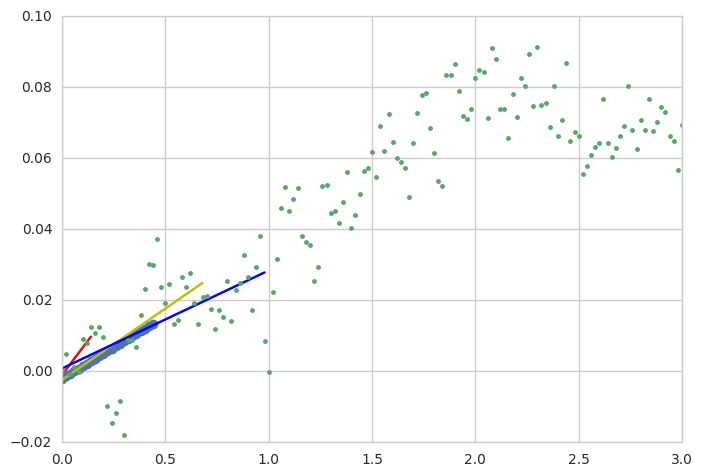

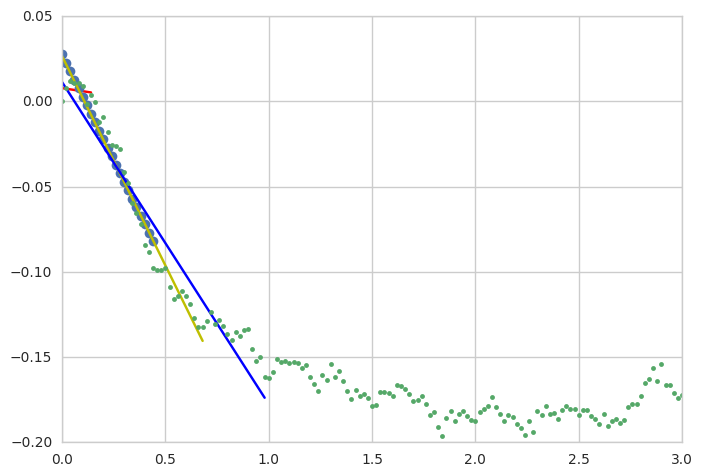

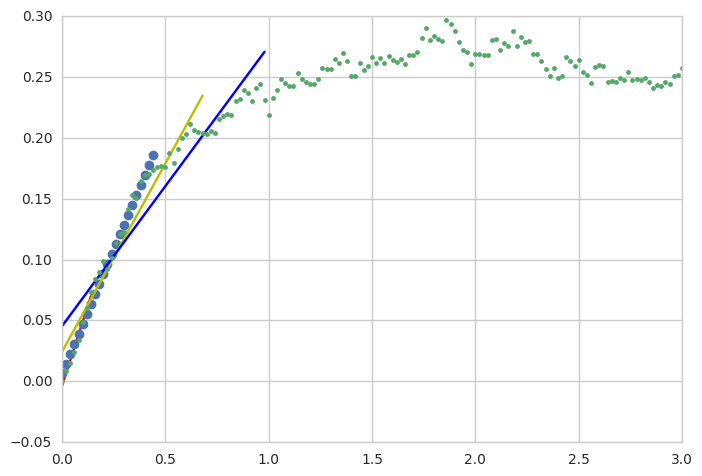

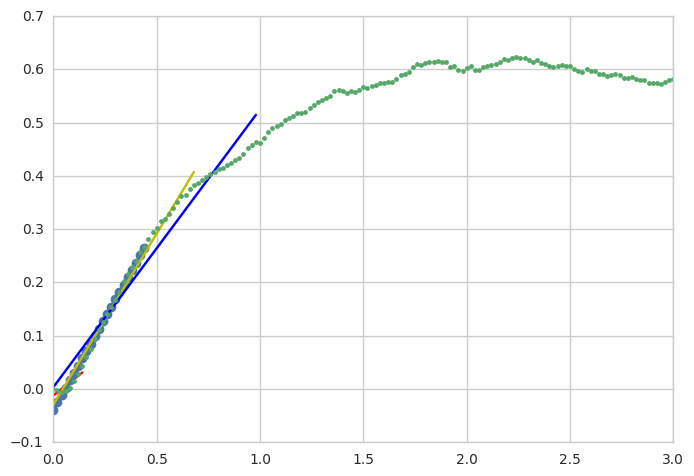

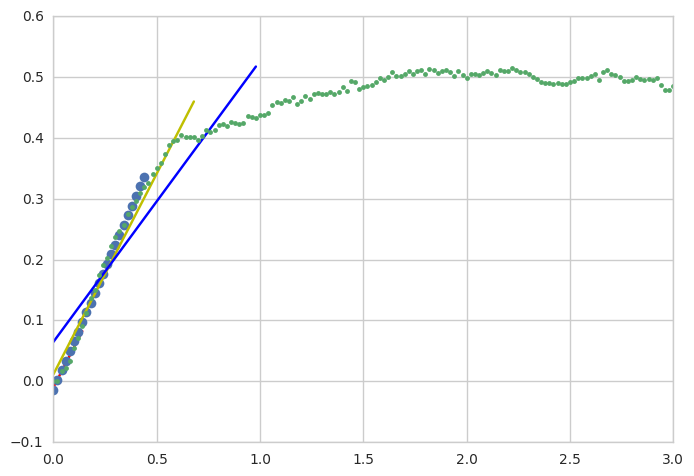

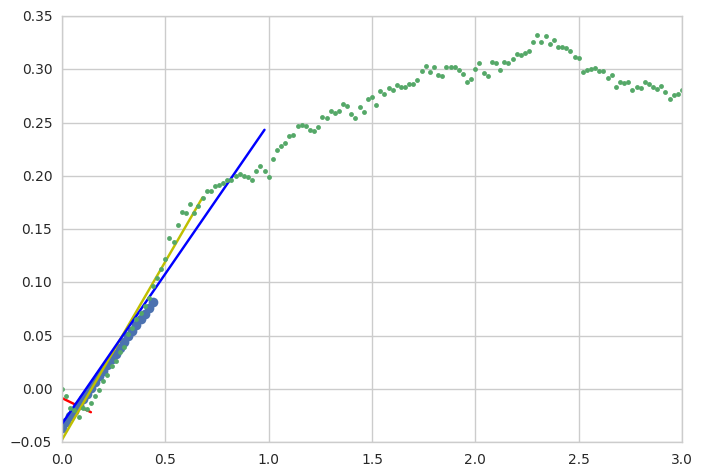

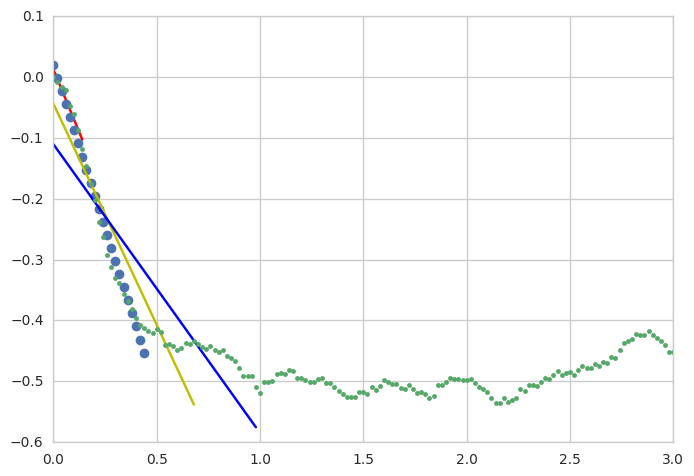

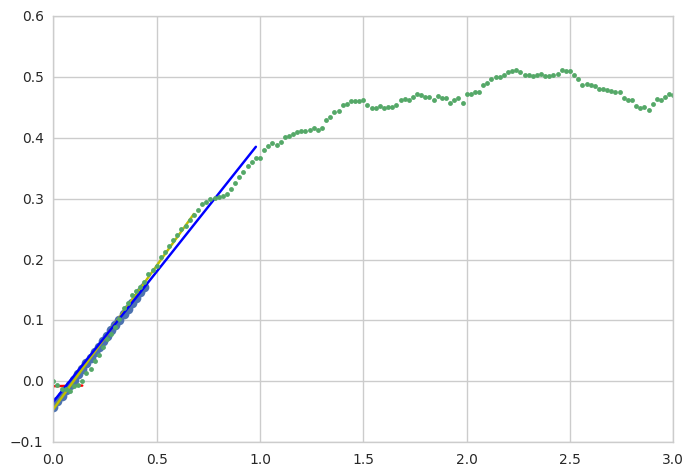

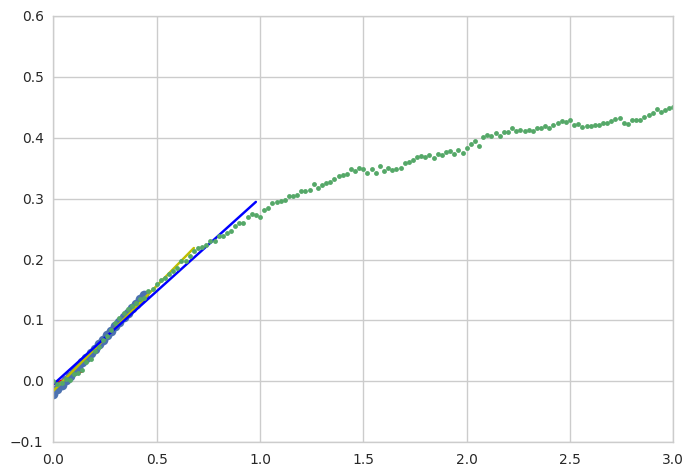

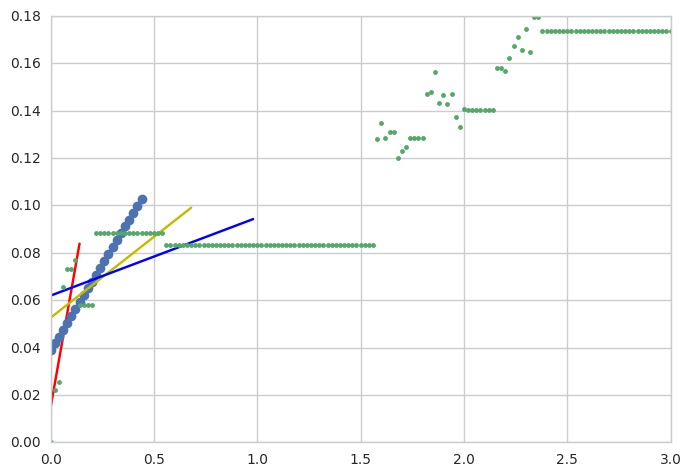

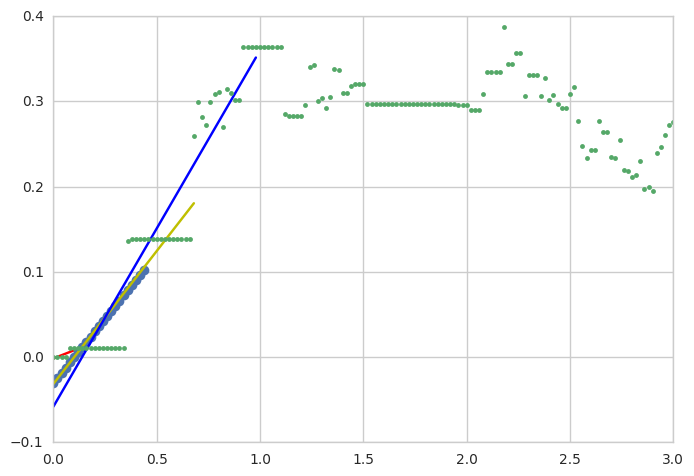

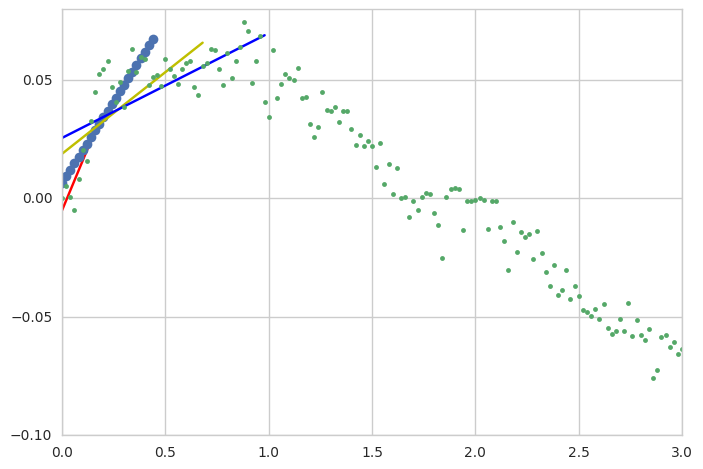

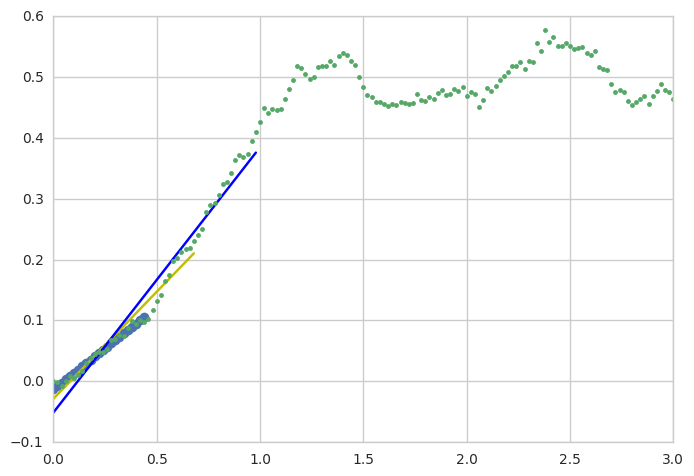

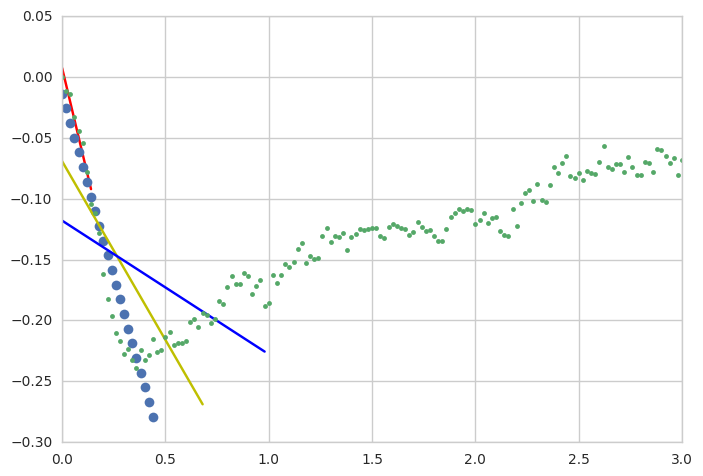

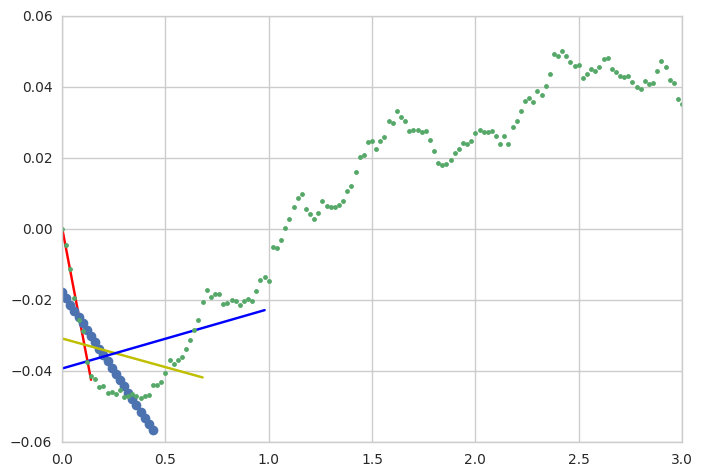

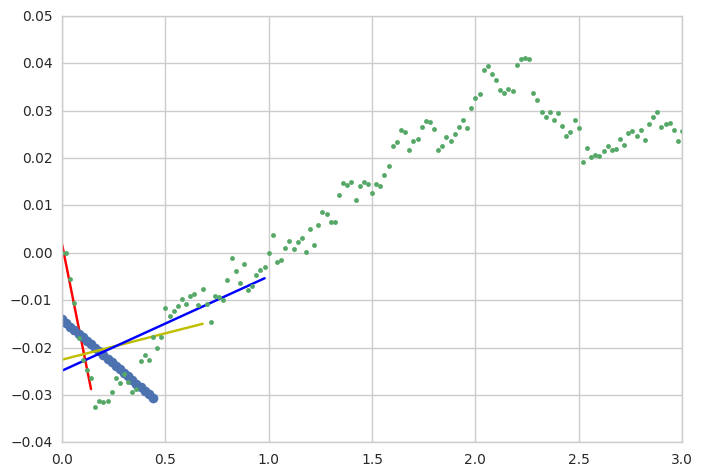

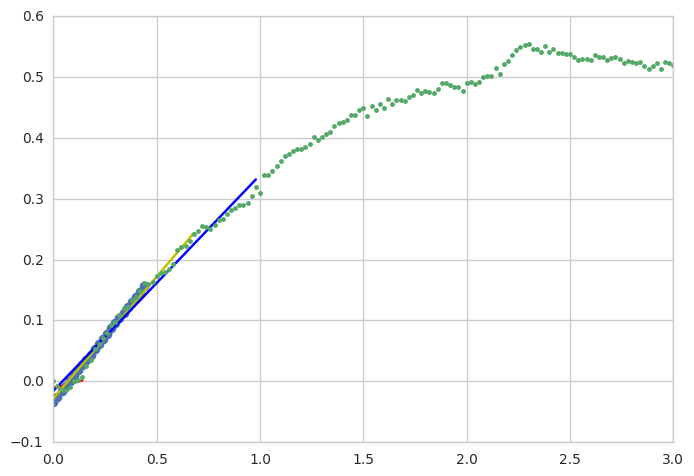

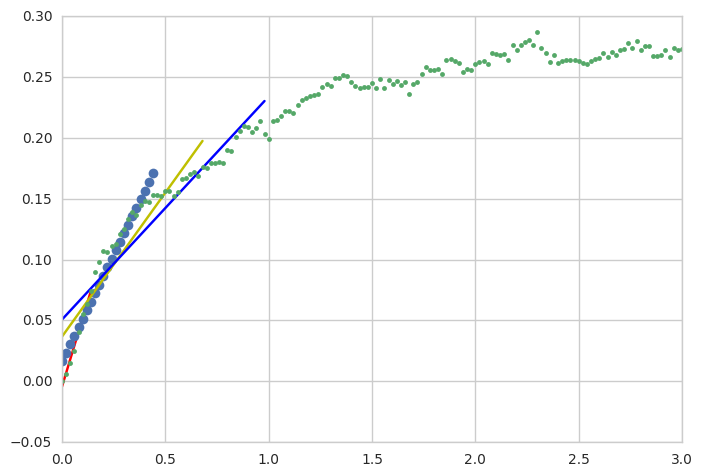

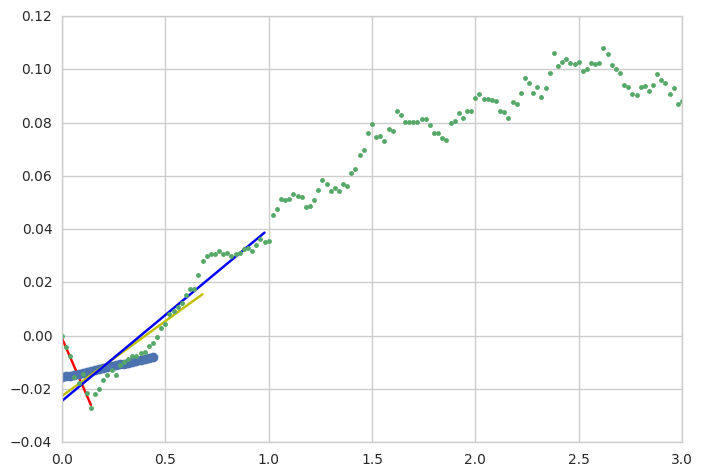

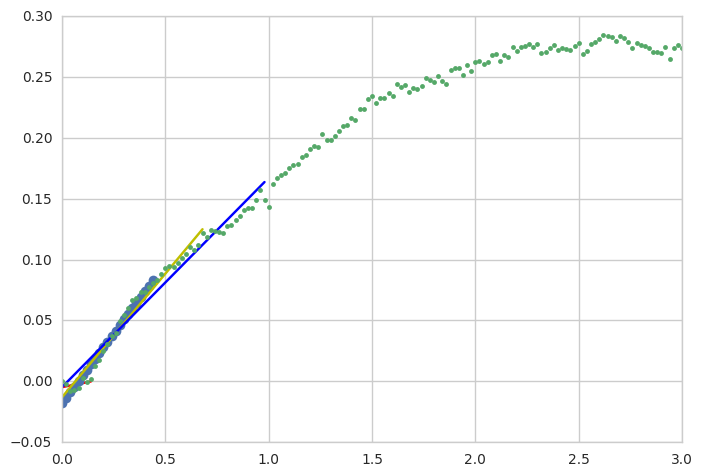

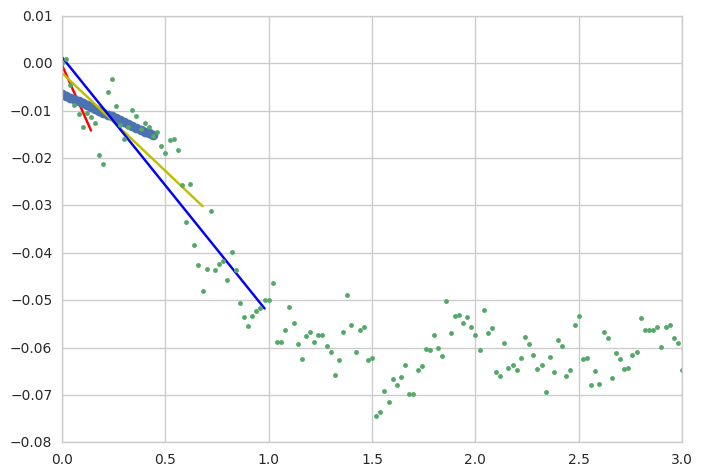

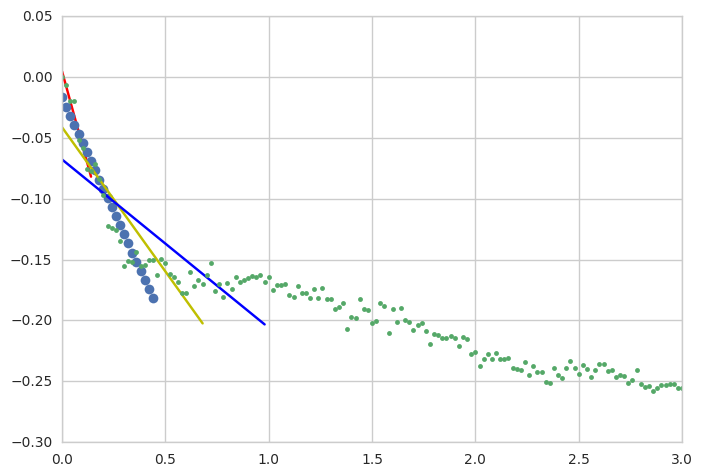

In [157]:
from scipy.stats import linregress

stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(500)*0.02
        colors = times[157:357]
        x1 = times[157:357]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[157:357]-muscle_choice[157]
        y_a = muscle_choice[157:165]-muscle_choice[157]
        y_b = muscle_choice[157:180]-muscle_choice[157]
        y_c = muscle_choice[157:192]-muscle_choice[157]
        y_d = muscle_choice[157:207]-muscle_choice[157]
        x_a = x[0:8]
        x_b = x[0:23]
        x_c = x[0:35]
        x_d = x[0:50]
        slope, intercept, rvalue, p_value, z = linregress(x, y)
        slope_a, intercept_a,  rvalue_a, p_value, z = linregress(x_a, y_a)
        slope_b, intercept_b,  rvalue_b, p_value, z = linregress(x_b, y_b)
        slope_c, intercept_c,  rvalue_c, p_value, z = linregress(x_c, y_c)
        slope_d, intercept_d,  rvalue_d, p_value, z = linregress(x_d, y_d)
        #popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        
        df =pd.DataFrame({'slope': slope,'rvalue': rvalue, 'slope_a': slope_a,'rvalue_a': rvalue_a,'slope 0.5 sec': slope_c,'rvalue 0.5 sec': rvalue_c, 'slope_b': slope_b,'rvalue_b': rvalue_b, 'slope 1 sec': slope_d,'rvalue 1 sec': rvalue_d}, index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
        
        plt.plot(x_a, (slope_a*x_a + intercept_a), 'r')
        plt.plot(x_b, (slope_b*x_b + intercept_b), 'o')
        plt.plot(x_c, (slope_c*x_c + intercept_c), 'y')
        plt.plot(x_d, (slope_d*x_d + intercept_d), 'b')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        
stimulus_df.to_csv('yaw_avg_slopes.csv') 

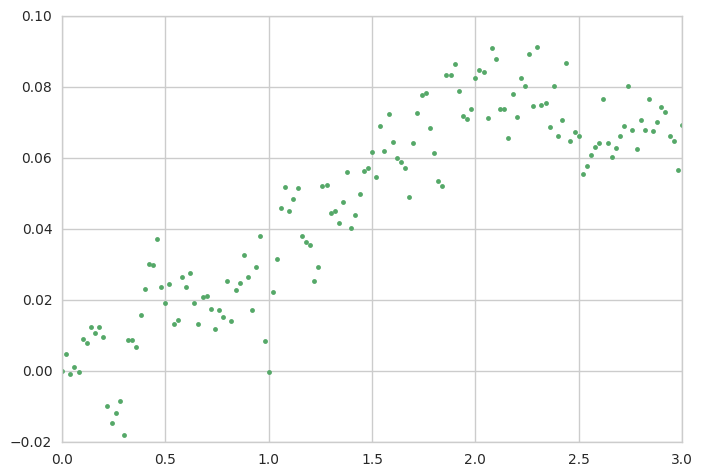

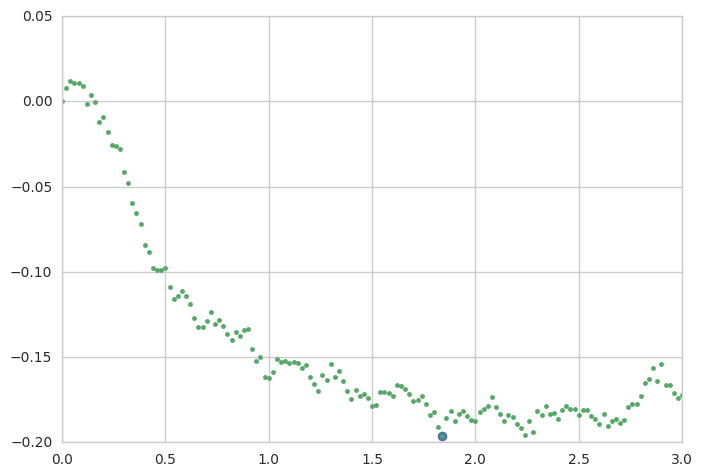

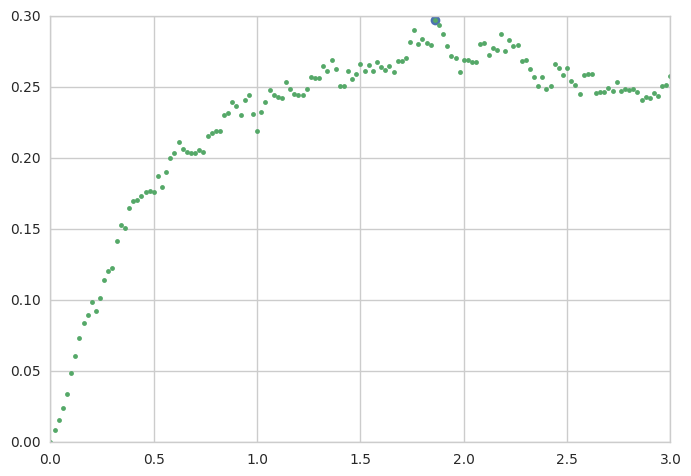

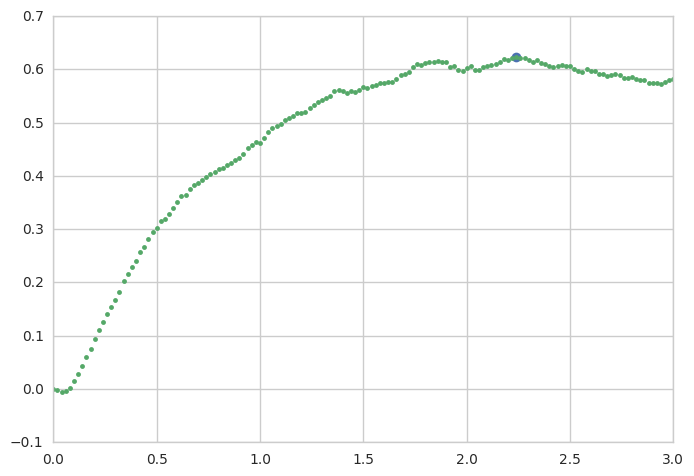

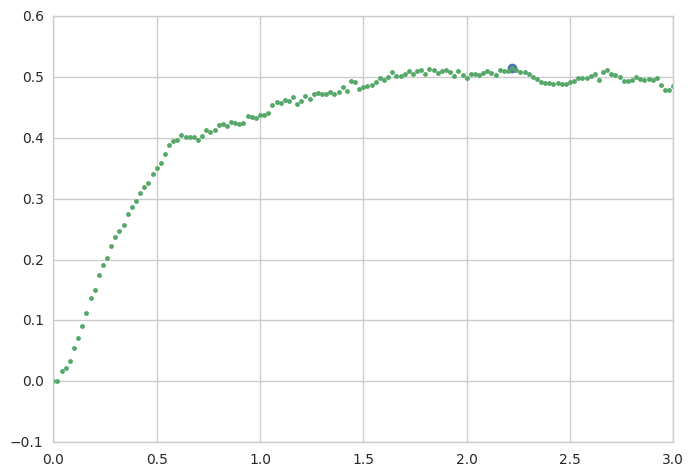

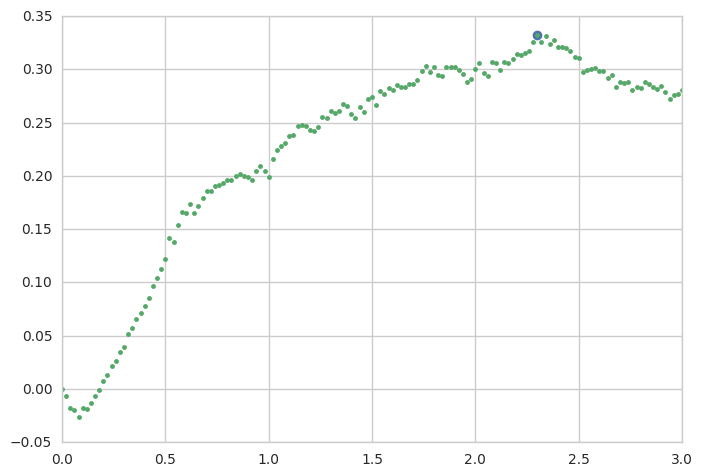

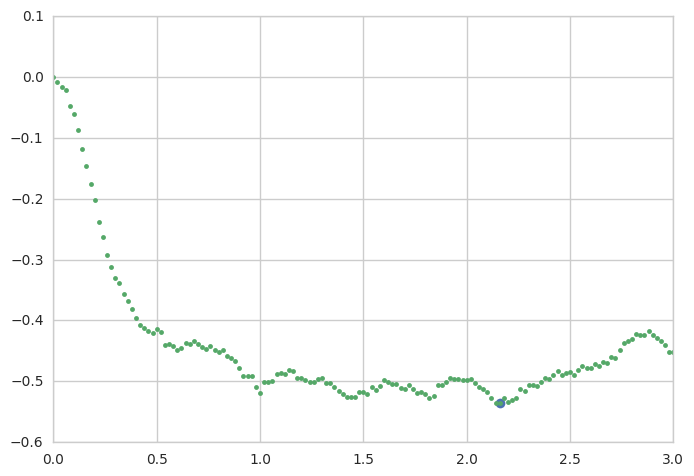

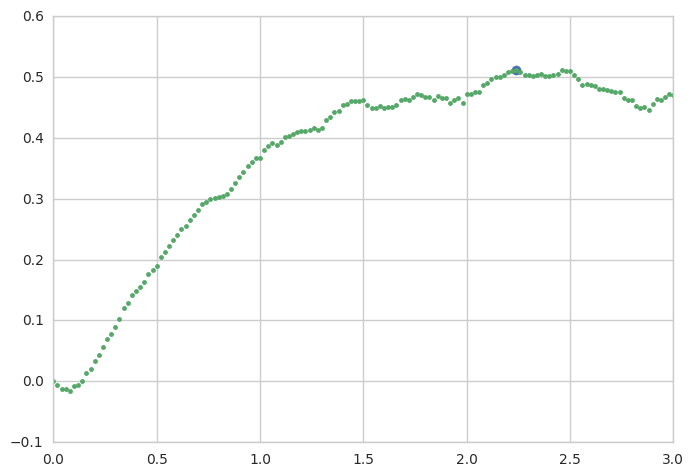

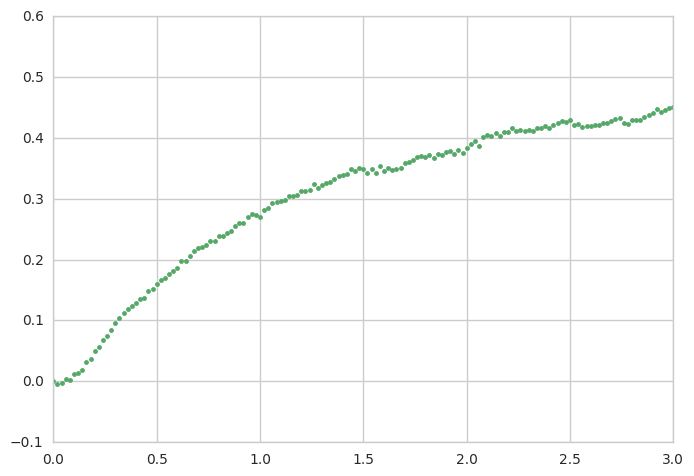

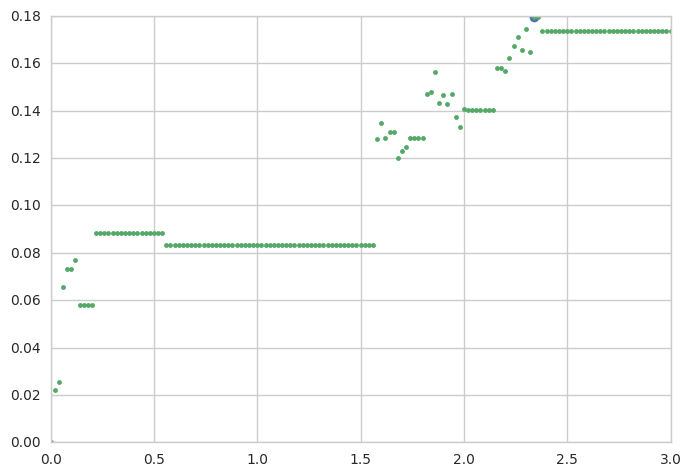

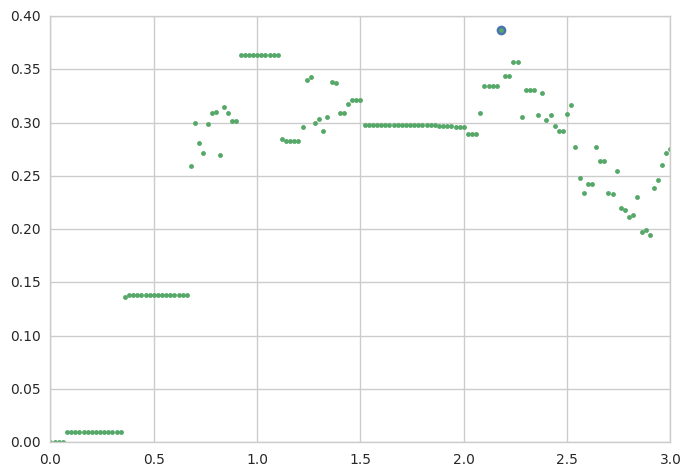

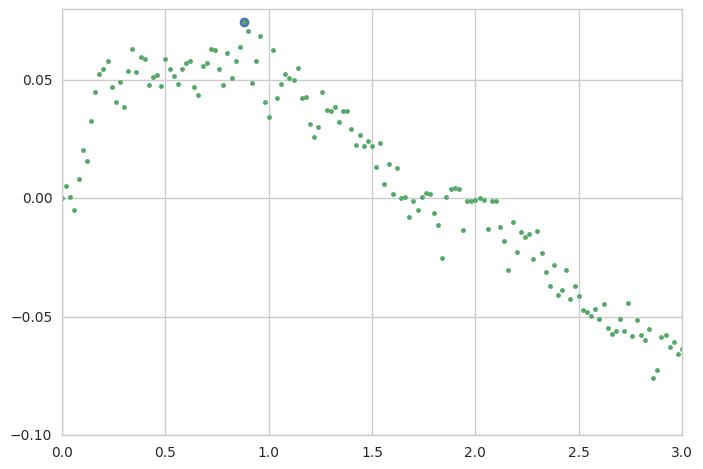

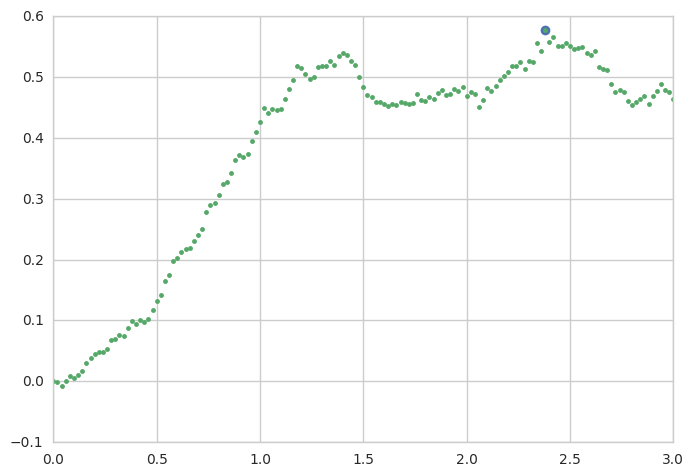

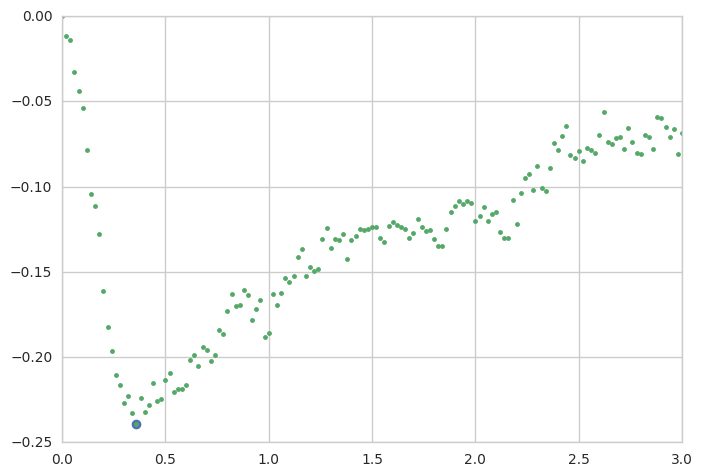

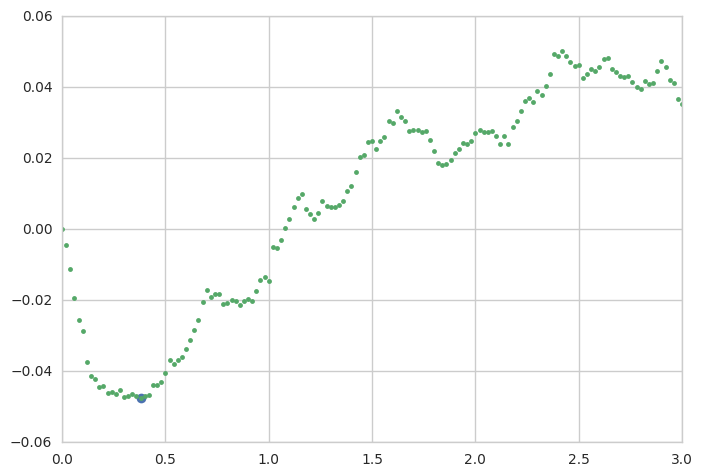

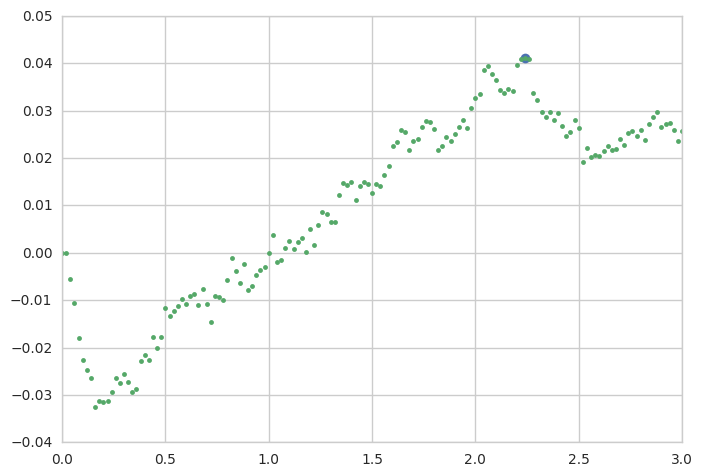

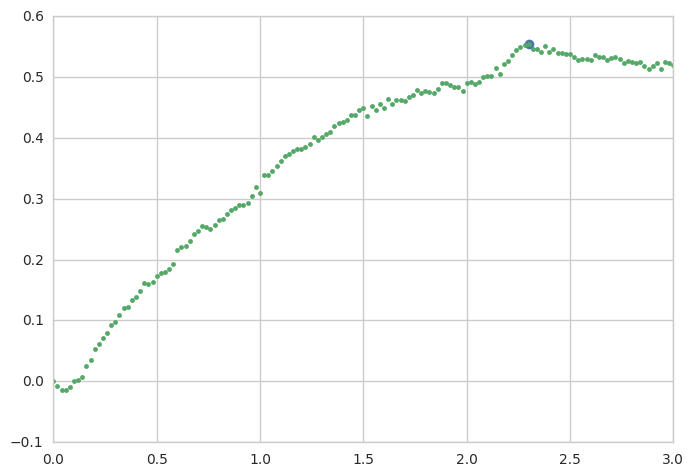

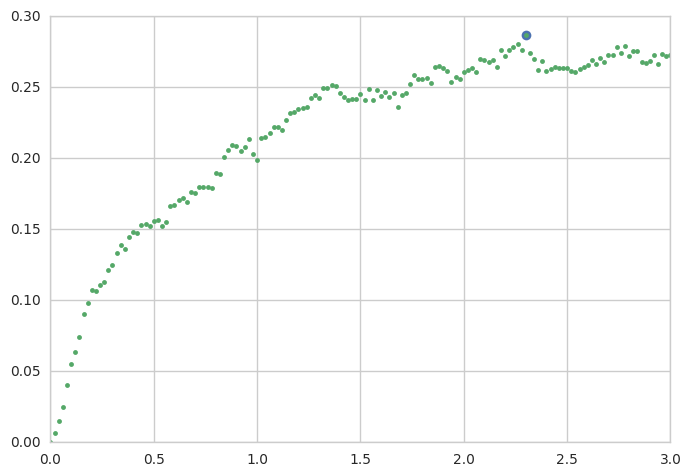

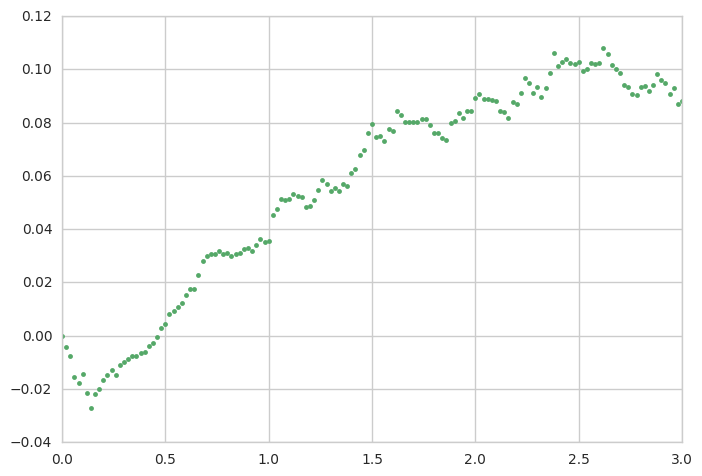

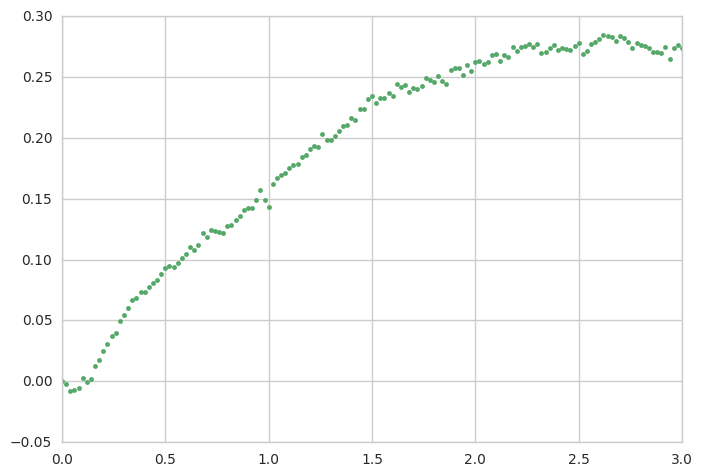

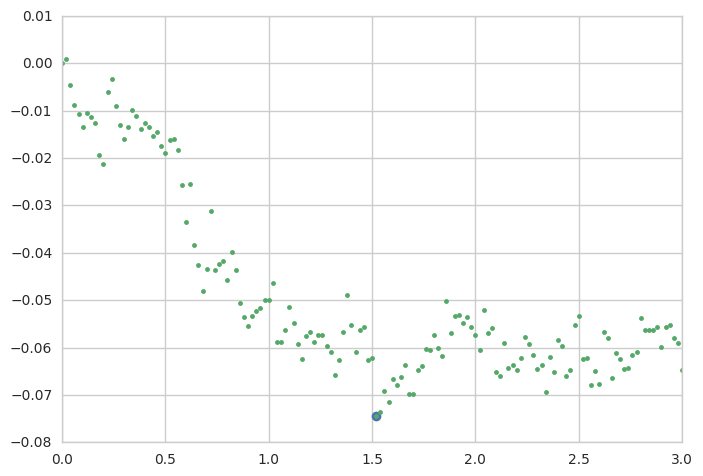

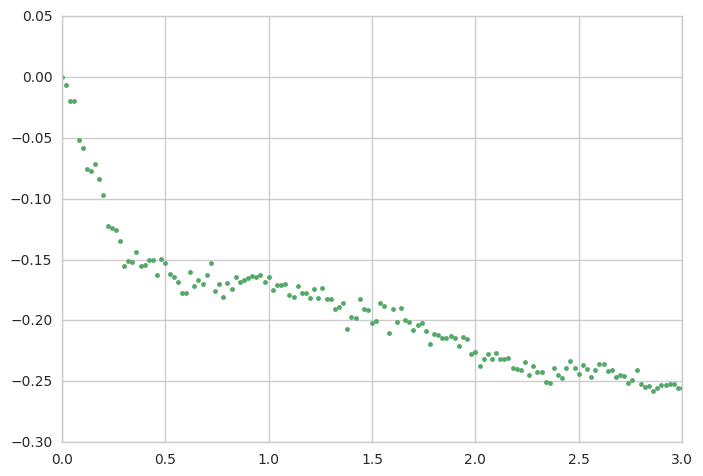

In [208]:
from scipy.stats import linregress

stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(500)*0.02
        colors = times[157:357]
        x1 = times[157:357]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[157:357]-muscle_choice[157]
        y2 = muscle_choice[357:500]-muscle_choice[357]
        x2 =times[357:500]
        x2 = x2 - x2[0]
        
        
        y_c = muscle_choice[157:192]-muscle_choice[157]
        x_c = x[0:35]
        slope_c, intercept_c,  rvalue_c, p_value, z = linregress(x_c, y_c)
        
        if slope_c > 0:
        
            peak = y.max()
            half_max = peak/2
            #time_to_peak = y.idxmax()
            time_to_peak =np.argmax(y)
            time_to_peak = time_to_peak - 157
            #time_to_half_max = y.index(round(half_max, 4))
            
            trough = y2.min()
            half_min = trough/2
            time_to_baseline = y2.idxmin()
            time_to_baseline =np.argmin(y2)
            #time_to_half_min = y2.index(round(half_max, 4)) 
            
        elif slope_c < 0:
        
            peak = y.min()
            half_max = peak/2
            #time_to_peak = y.idxmin()
            time_to_peak = np.argmin(y)
            time_to_peak = time_to_peak - 157
            

            #time_to_half_max = y.index(round(half_max, 4))
            
            trough = y2.max()
            half_min = trough/2
            #time_to_baseline = y2.idxmax()
            time_to_baseline =np.argmax(y2)
            #time_to_half_min = y2.index(round(half_max, 4))                           

        
        #popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        
        #df =pd.DataFrame({'slope': slope,'rvalue': rvalue, 'slope_a': slope_a,'rvalue_a': rvalue_a,'slope 0.5 sec': slope_c,'rvalue 0.5 sec': rvalue_c, 'slope_b': slope_b,'rvalue_b': rvalue_b, 'slope 1 sec': slope_d,'rvalue 1 sec': rvalue_d}, index=[muscle])
        #stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
        
        plt.plot(x[time_to_peak], peak, 'o', red)
        #plt.plot(time_to_half_max, half_max, 'o')
        #plt.plot(x_c, (slope_c*x_c + intercept_c), 'y')
        #plt.plot(x_d, (slope_d*x_d + intercept_d), 'b')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        
#stimulus_df.to_csv('yaw_avg_slopes.csv') 

In [190]:
round(half_max, 4)

0.0469

In [206]:
np.argmax(y)

323

In [202]:
y.argmax()
y.idxmax()

323

In [200]:
len(y)

200

In [201]:
y.argmin()

172

In [158]:
stimulus_df

rvalue  rvalue 0.5 sec  rvalue 1 sec  rvalue_a  rvalue_b     slope  \
b1_l    0.861540        0.608078      0.619374  0.754604  0.374757  0.020851   
b2_l   -0.622384       -0.981919     -0.965136 -0.169470 -0.951842 -0.026398   
b3_l    0.525277        0.973694      0.953585  0.992931  0.992089  0.025426   
i1_l    0.717265        0.994565      0.981692  0.857346  0.991109  0.098785   
i2_l    0.607323        0.986180      0.943546  0.978777  0.995535  0.058084   
iii1_l  0.735456        0.978938      0.975166 -0.560950  0.942195  0.057101   
iii3_l -0.309476       -0.944339     -0.895242 -0.968717 -0.990065 -0.027130   
hg1_l   0.730915        0.991116      0.992228  0.057073  0.968826  0.088553   
hg2_l   0.933844        0.995145      0.992683  0.924479  0.989279  0.108330   
hg3_l   0.916237        0.653104      0.528344  0.828682  0.785126  0.034864   
hg4_l   0.275091        0.881045      0.952853  0.872872  0.748070  0.022559   
b1_r   -0.925187        0.720835      0.690980  0.825390  0.841780 -0.038275   
b2_r    0.540315        0.977995      0.984379  0.839335  0.987928  0.071671   
b3_r    0.709556       -0.786727     -0.497953 -0.977097 -0.948772  0.032068   
i1_r    0.834844       -0.261937      0.366816 -0.996500 -0.811895  0.021263   
i2_r    0.794980        0.241382      0.587899 -0.981672 -0.529740  0.013096   
iii1_r  0.866624        0.992385      0.991102  0.526350  0.982749  0.121246   
iii3_r  0.813397        0.936537      0.941829  0.994196  0.968624  0.042887   
hg1_r   0.897247        0.836653      0.936958 -0.963300  0.337491  0.030132   
hg2_r   0.885424        0.986932      0.984446  0.402352  0.977923  0.065895   
hg3_r  -0.560376       -0.779757     -0.921353 -0.887049 -0.494757 -0.008449   
hg4_r  -0.926019       -0.906494     -0.815201 -0.978311 -0.956103 -0.046403   

        slope 0.5 sec  slope 1 sec   slope_a   slope_b  
b1_l         0.040164     0.027591  0.077126  0.035309  
b2_l        -0.245513    -0.188867 -0.018040 -0.249346  
b3_l         0.309401     0.229898  0.525668  0.407625  
i1_l         0.642168     0.521452  0.307784  0.689483  
i2_l         0.658971     0.461483  0.660956  0.794837  
iii1_l       0.334404     0.281529 -0.094808  0.267667  
iii3_l      -0.726955    -0.474354 -0.823052 -1.073441  
hg1_l        0.471527     0.427210  0.006847  0.447611  
hg2_l        0.345040     0.305696  0.154970  0.368876  
hg3_l        0.068314     0.032979  0.493967  0.145260  
hg4_l        0.311655     0.417893  0.095400  0.302644  
b1_r         0.068965     0.044233  0.210062  0.138153  
b2_r         0.351152     0.435610  0.138714  0.269209  
b3_r        -0.293520    -0.109732 -0.710641 -0.602657  
i1_r        -0.016133     0.016770 -0.305472 -0.088554  
i2_r         0.011127     0.019912 -0.218117 -0.037589  
iii1_r       0.399799     0.354311  0.085418  0.431335  
iii3_r       0.236351     0.183131  0.561140  0.350657  
hg1_r        0.056229     0.064464 -0.178403  0.017299  
hg2_r        0.202946     0.171856  0.033333  0.229940  
hg3_r       -0.041357    -0.054133 -0.098446 -0.019917  
hg4_r       -0.236719    -0.138151 -0.616782 -0.374670

In [ ]:
from scipy.stats import linregress
linregress(a, b)

slope, intercept, rvalue


In [136]:
#linregress(x_a, y_a)

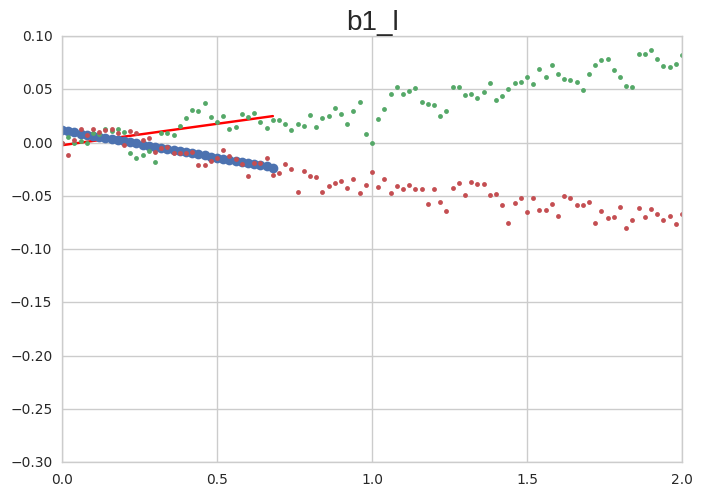

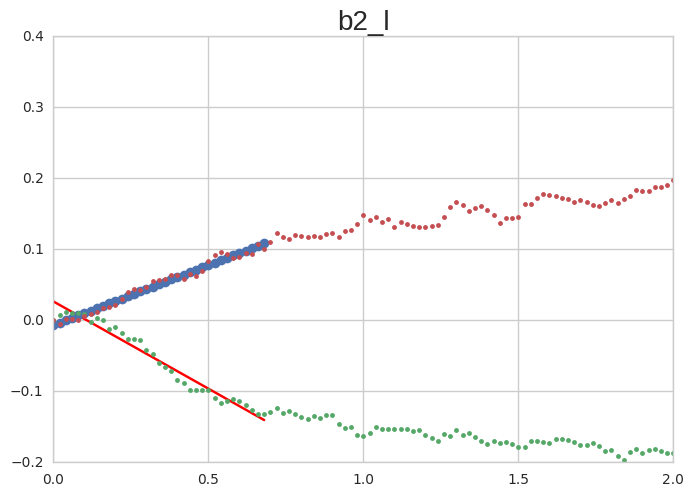

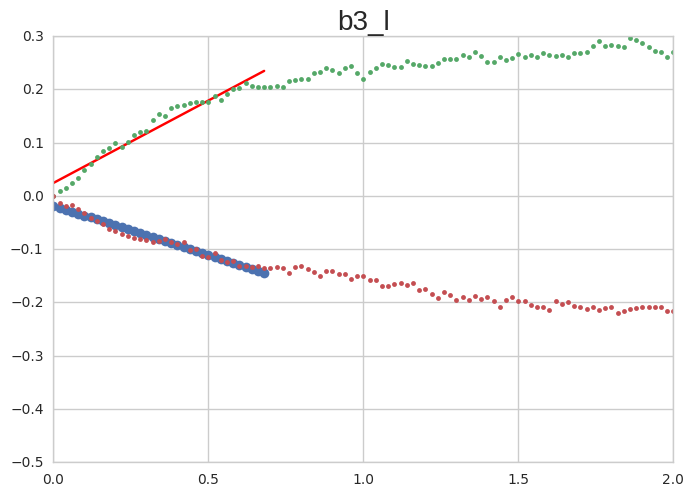

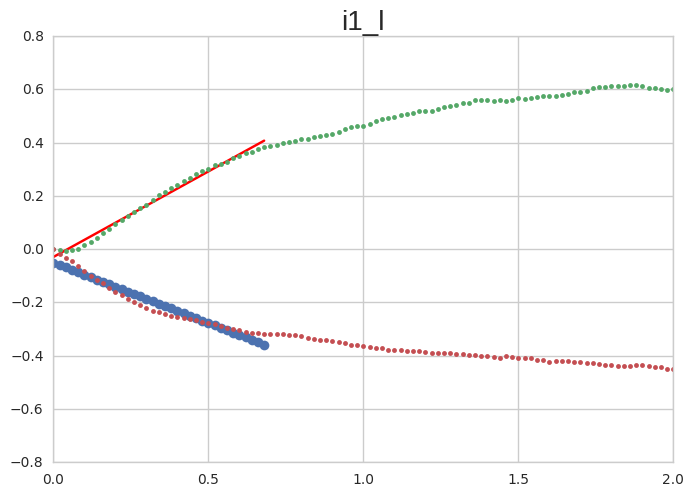

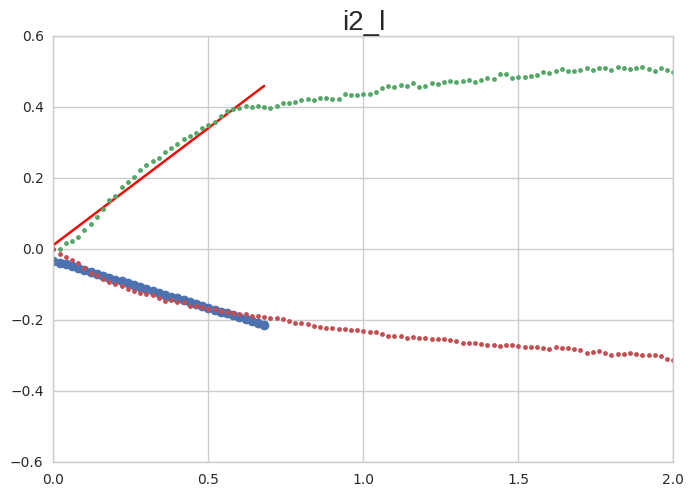

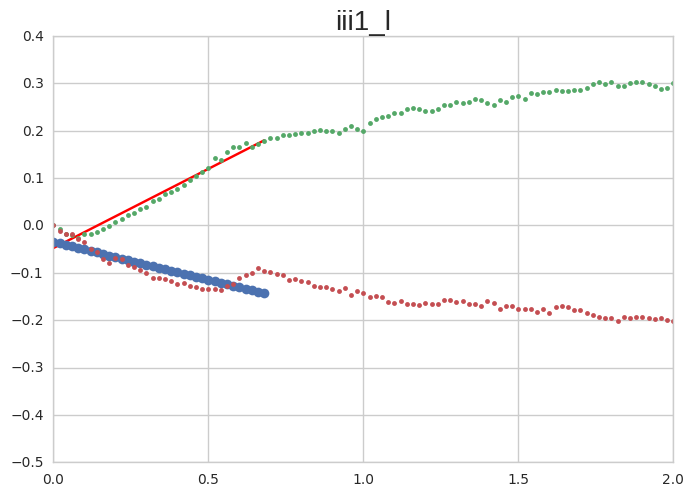

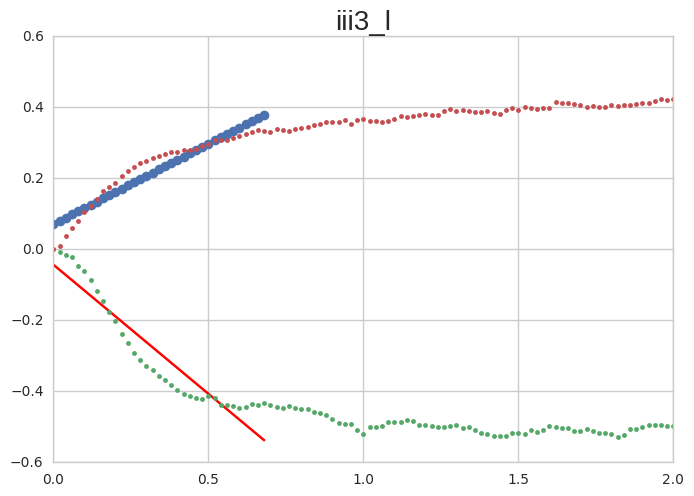

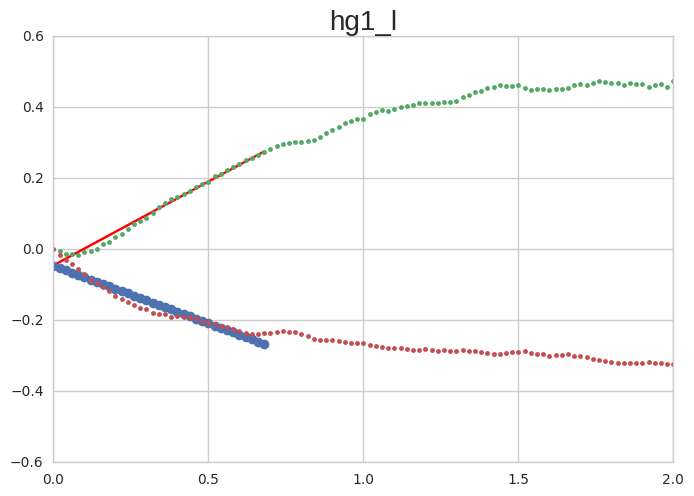

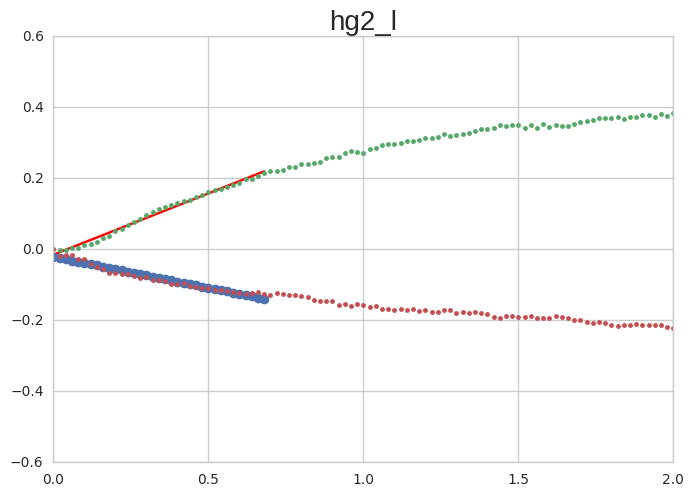

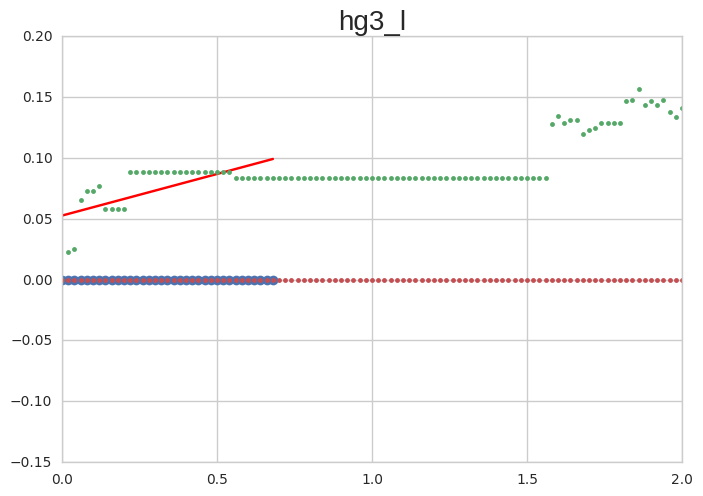

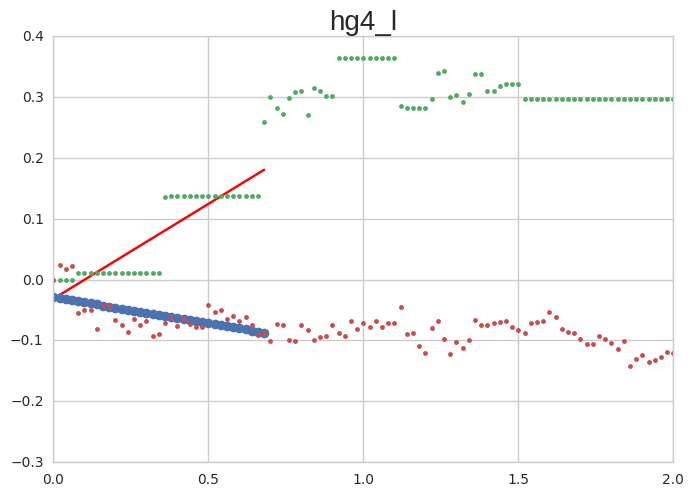

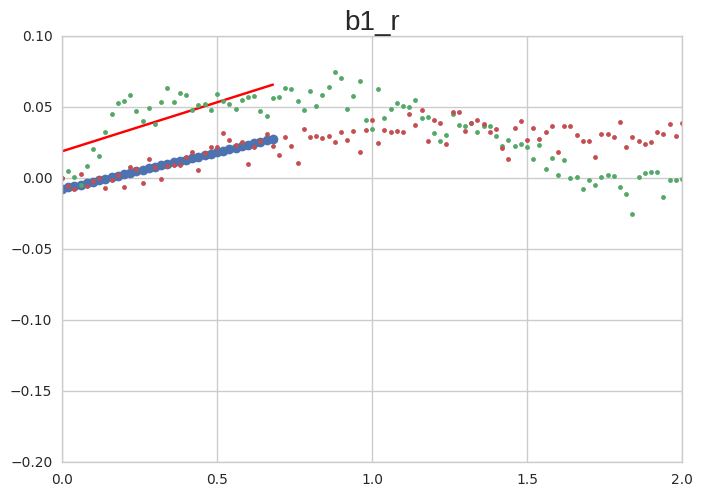

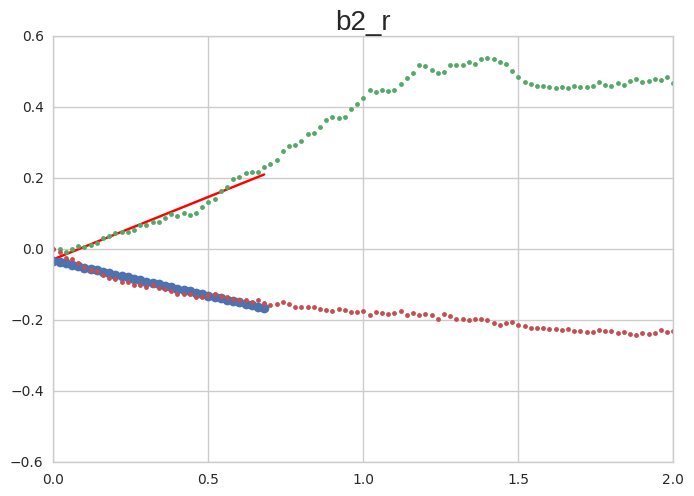

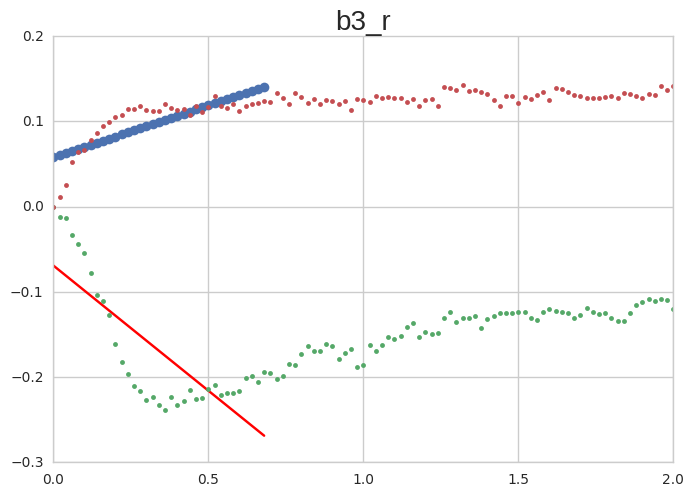

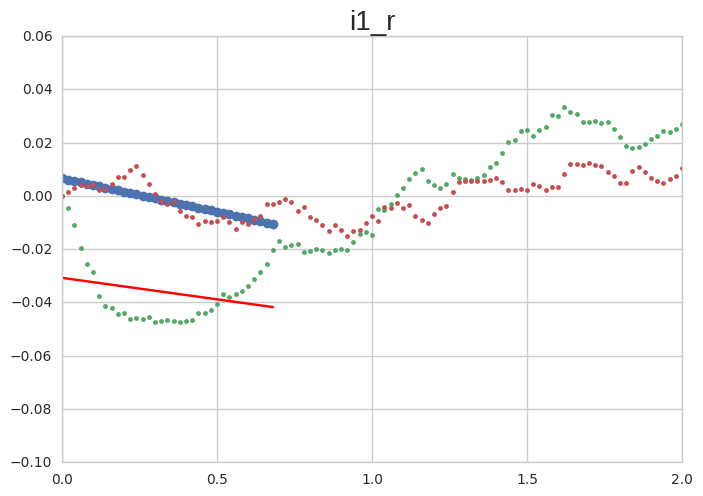

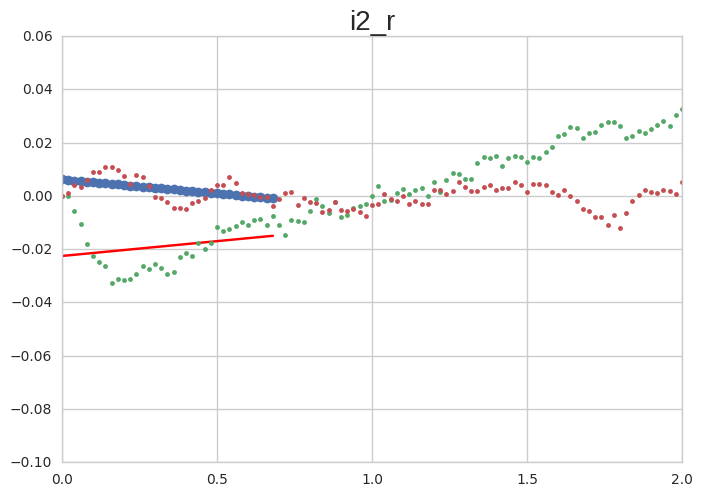

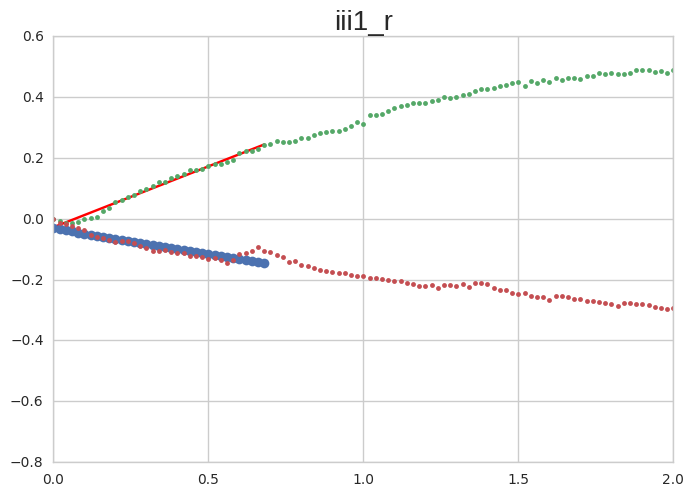

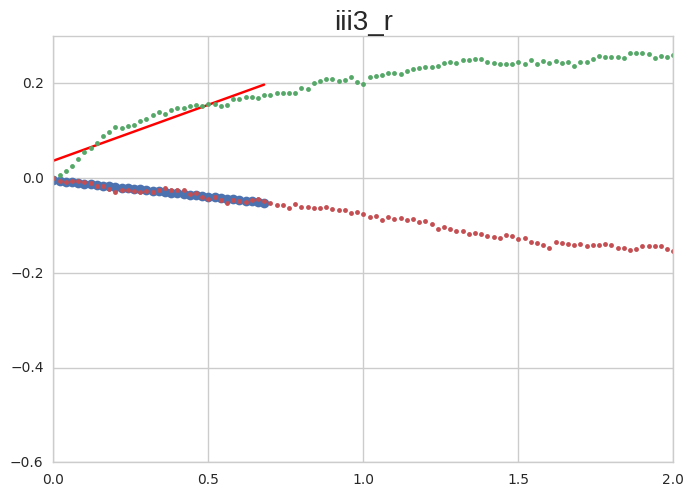

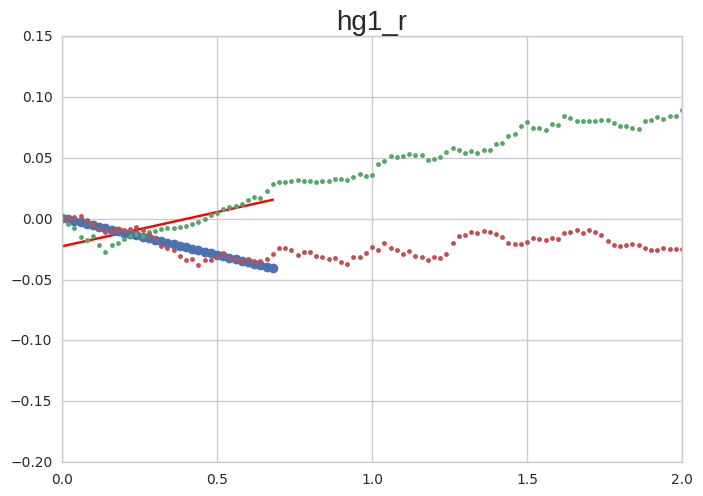

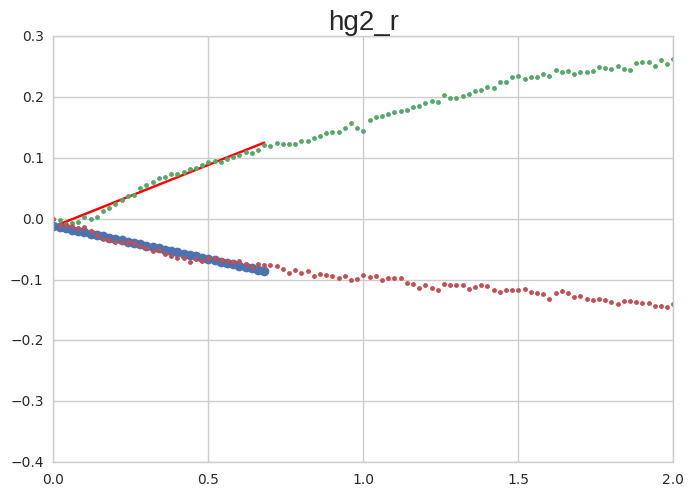

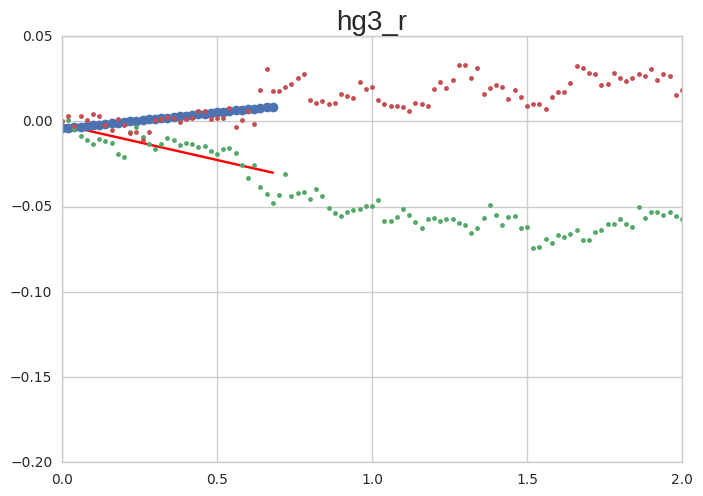

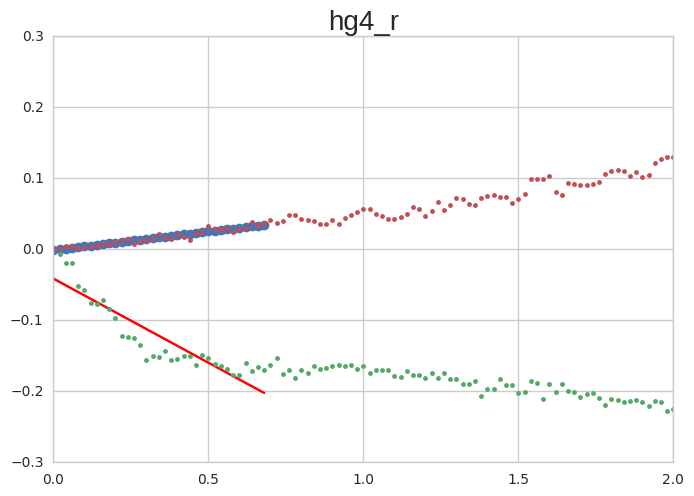

In [170]:
from scipy.stats import linregress

stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(500)*0.02
        colors = times[157:357]
        x1 = times[157:357]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[157:357]-muscle_choice[157]
        y_decay_2s = muscle_choice[357:500]-muscle_choice[357]
        y_onset = muscle_choice[157:192]-muscle_choice[157]
        y_decay = muscle_choice[357:392]-muscle_choice[357]
        x_onset = x[0:35]
        x_decay = x[0:35]
        x_decay_2s = x[0:143]
        slope, intercept, rvalue, p_value, z = linregress(x, y)
        slope_onset, intercept_onset,  rvalue_onset, p_value_onset, z_onset = linregress(x_onset, y_onset)
        slope_decay, intercept_decay,  rvalue_decay, p_value_decay, z_decay = linregress(x_decay, y_decay)
        #slope_b, intercept_b,  rvalue_b, p_value, z = linregress(x_b, y_b)
        #slope_c, intercept_c,  rvalue_c, p_value, z = linregress(x_c, y_c)
        #slope_d, intercept_d,  rvalue_d, p_value, z = linregress(x_d, y_d)
        #popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=2000000)
        
        
        df =pd.DataFrame({'slope onset': slope_onset,'rvalue onset': rvalue_onset, 'slope decay': slope_decay,'rvalue decay': rvalue_decay, 'muscle': muscle}, index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
        
        plt.plot(x_onset, (slope_onset*x_onset + intercept_onset), 'r')
        plt.plot(x_decay, (slope_decay*x_decay + intercept_decay), 'o')
        #plt.plot(x_c, (slope_c*x_c + intercept_c), 'y')
        #plt.plot(x_d, (slope_d*x_d + intercept_d), 'b')
        plt.plot(x, y, '.')
        plt.plot(x_decay_2s, y_decay_2s, '.')
        plt.title(muscle, fontsize=20)
        plt.xlim(0, 2)
        plt.show()
        
stimulus_df.to_csv('yaw_avg_slopes_onset_decay.csv') 

In [168]:
stimulus_df

muscle  rvalue decay  rvalue onset  slope decay  slope onset
b1_l      b1_l     -0.820231      0.608078    -0.051339     0.040164
b2_l      b2_l      0.986737     -0.981919     0.168759    -0.245513
b3_l      b3_l     -0.978439      0.973694    -0.184920     0.309401
i1_l      i1_l     -0.963803      0.994565    -0.452348     0.642168
i2_l      i2_l     -0.968224      0.986180    -0.265255     0.658971
iii1_l  iii1_l     -0.819784      0.978938    -0.159723     0.334404
iii3_l  iii3_l      0.941005     -0.944339     0.452417    -0.726955
hg1_l    hg1_l     -0.956904      0.991116    -0.323873     0.471527
hg2_l    hg2_l     -0.968985      0.995145    -0.174200     0.345040
hg3_l    hg3_l      0.000000      0.653104     0.000000     0.068314
hg4_l    hg4_l     -0.575150      0.881045    -0.085539     0.311655
b1_r      b1_r      0.881709      0.720835     0.051635     0.068965
b2_r      b2_r     -0.949551      0.977995    -0.196106     0.351152
b3_r      b3_r      0.774181     -0.786727     0.122187    -0.293520
i1_r      i1_r     -0.754651     -0.261937    -0.025182    -0.016133
i2_r      i2_r     -0.461040      0.241382    -0.010451     0.011127
iii1_r  iii1_r     -0.874633      0.992385    -0.165554     0.399799
iii3_r  iii3_r     -0.946551      0.936537    -0.069064     0.236351
hg1_r    hg1_r     -0.924155      0.836653    -0.061297     0.056229
hg2_r    hg2_r     -0.966162      0.986932    -0.109782     0.202946
hg3_r    hg3_r      0.505622     -0.779757     0.018844    -0.041357
hg4_r    hg4_r      0.954893     -0.906494     0.052312    -0.236719

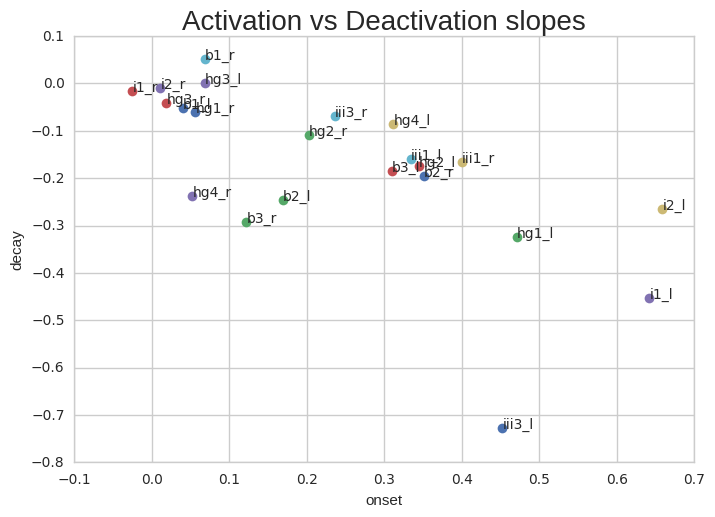

In [177]:
from scipy.stats import linregress

#stimulus_df = pd.DataFrame()
#stimulus = yaw_right_df

for num_muscle in range(len(stimulus_df['muscle'])): 
        
        if stimulus_df['slope onset'][num_muscle] > 0 :
        
            slope_off = stimulus_df['slope decay'][num_muscle]
            slope_on = stimulus_df['slope onset'][num_muscle]
            
        elif stimulus_df['slope onset'][num_muscle] < 0: 
            
            slope_on = stimulus_df['slope decay'][num_muscle]
            slope_off = stimulus_df['slope onset'][num_muscle]
        
    
        plt.plot(slope_on, slope_off, 'o')
        plt.text(slope_on, slope_off, stimulus_df['muscle'][num_muscle])
        #plt.plot(x_decay, (slope_decay*x_decay + intercept_decay), 'o')
        plt.title('Activation vs Deactivation slopes', fontsize=20)
        plt.xlabel('onset')
        plt.ylabel('decay')
        #plt.xlim(0, 2)
        
plt.show()
        
#stimulus_df.to_csv('yaw_avg_slopes_onset_decay.csv') 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = stimulus_df['slop]
y = stimulus_df['freq_firing']

plt.scatter(x[0::1000], y[0::1000], c= 'yellow', alpha=0.5)
plt.show()

In [116]:
#yaw_right_data_avgs = 


yr_b1l = np.median(yaw_right_df['b1_l'][150:350])
yr_b2l =  np.median(yaw_right_df['b2_l'][150:350])
yr_b3l =  np.median(yaw_right_df['b3_l'][150:350])
yr_i1l =  np.median(yaw_right_df['i1_l'][150:350])
yr_i2l =  np.median(yaw_right_df['i2_l'][150:350])
yr_iii1l =  np.median(yaw_right_df['iii1_l'][150:350])
yr_iii3l =  np.median(yaw_right_df['iii3_l'][150:350])
yr_hg1l =  np.median(yaw_right_df['hg1_l'][150:350])
yr_hg2l =  np.median(yaw_right_df['hg2_l'][150:350])
yr_hg3l =  np.median(yaw_right_df['hg3_l'][150:350])
yr_hg4l =  np.median(yaw_right_df['hg4_l'][150:350])
yr_b1r =  np.median(yaw_right_df['b1_r'][150:350])
yr_b2r =  np.median(yaw_right_df['b2_r'][150:350])
yr_b3r =  np.median(yaw_right_df['b3_r'][150:350])
yr_i1r =  np.median(yaw_right_df['i1_r'][150:350])
yr_i2r =  np.median(yaw_right_df['i2_r'][150:350])
yr_iii1r =  np.median(yaw_right_df['iii1_r'][150:350])
yr_iii3r =  np.median(yaw_right_df['iii3_r'][150:350])
yr_hg1r =  np.median(yaw_right_df['hg1_r'][150:350])
yr_hg2r =  np.median(yaw_right_df['hg2_r'][150:350])
yr_hg3r =  np.median(yaw_right_df['hg3_r'][150:350])
yr_hg4r =  np.median(yaw_right_df['hg4_r'][150:350])


rc_b1l = np.median(roll_cw_df['b1_l'][150:350])
rc_b2l =  np.median(roll_cw_df['b2_l'][150:350])
rc_b3l =  np.median(roll_cw_df['b3_l'][150:350])
rc_i1l =  np.median(roll_cw_df['i1_l'][150:350])
rc_i2l =  np.median(roll_cw_df['i2_l'][150:350])
rc_iii1l =  np.median(roll_cw_df['iii1_l'][150:350])
rc_iii3l =  np.median(roll_cw_df['iii3_l'][150:350])
rc_hg1l =  np.median(roll_cw_df['hg1_l'][150:350])
rc_hg2l =  np.median(roll_cw_df['hg2_l'][150:350])
rc_hg3l =  np.median(roll_cw_df['hg3_l'][150:350])
rc_hg4l =  np.median(roll_cw_df['hg4_l'][150:350])
rc_b1r =  np.median(roll_cw_df['b1_r'][150:350])
rc_b2r =  np.median(roll_cw_df['b2_r'][150:350])
rc_b3r =  np.median(roll_cw_df['b3_r'][150:350])
rc_i1r =  np.median(roll_cw_df['i1_r'][150:350])
rc_i2r =  np.median(roll_cw_df['i2_r'][150:350])
rc_iii1r =  np.median(roll_cw_df['iii1_r'][150:350])
rc_iii3r =  np.median(roll_cw_df['iii3_r'][150:350])
rc_hg1r =  np.median(roll_cw_df['hg1_r'][150:350])
rc_hg2r =  np.median(roll_cw_df['hg2_r'][150:350])
rc_hg3r =  np.median(roll_cw_df['hg3_r'][150:350])
rc_hg4r =  np.median(roll_cw_df['hg4_r'][150:350])



In [117]:
all_yr_b1l = np.median(yaw_right_df['b1_l'][0:150])
all_yr_b2l =  np.median(yaw_right_df['b2_l'][0:150])
all_yr_b3l =  np.median(yaw_right_df['b3_l'][0:150])
all_yr_i1l =  np.median(yaw_right_df['i1_l'][0:150])
all_yr_i2l =  np.median(yaw_right_df['i2_l'][0:150])
all_yr_iii1l =  np.median(yaw_right_df['iii1_l'][0:150])
all_yr_iii3l =  np.median(yaw_right_df['iii3_l'][0:150])
all_yr_hg1l =  np.median(yaw_right_df['hg1_l'][0:150])
all_yr_hg2l =  np.median(yaw_right_df['hg2_l'][0:150])
all_yr_hg3l =  np.median(yaw_right_df['hg3_l'][0:150])
all_yr_hg4l =  np.median(yaw_right_df['hg4_l'][0:150])
all_yr_b1r =  np.median(yaw_right_df['b1_r'][0:150])
all_yr_b2r =  np.median(yaw_right_df['b2_r'][0:150])
all_yr_b3r =  np.median(yaw_right_df['b3_r'][0:150])
all_yr_i1r =  np.median(yaw_right_df['i1_r'][0:150])
all_yr_i2r =  np.median(yaw_right_df['i2_r'][0:150])
all_yr_iii1r =  np.median(yaw_right_df['iii1_r'][0:150])
all_yr_iii3r =  np.median(yaw_right_df['iii3_r'][0:150])
all_yr_hg1r =  np.median(yaw_right_df['hg1_r'][0:150])
all_yr_hg2r =  np.median(yaw_right_df['hg2_r'][0:150])
all_yr_hg3r =  np.median(yaw_right_df['hg3_r'][0:150])
all_yr_hg4r =  np.median(yaw_right_df['hg4_r'][0:150])



all_rc_b1l = np.median(roll_cw_df['b1_l'][0:150])
all_rc_b2l =  np.median(roll_cw_df['b2_l'][0:150])
all_rc_b3l =  np.median(roll_cw_df['b3_l'][0:150])
all_rc_i1l =  np.median(roll_cw_df['i1_l'][0:150])
all_rc_i2l =  np.median(roll_cw_df['i2_l'][0:150])
all_rc_iii1l =  np.median(roll_cw_df['iii1_l'][0:150])
all_rc_iii3l =  np.median(roll_cw_df['iii3_l'][0:150])
all_rc_hg1l =  np.median(roll_cw_df['hg1_l'][0:150])
all_rc_hg2l =  np.median(roll_cw_df['hg2_l'][0:150])
all_rc_hg3l =  np.median(roll_cw_df['hg3_l'][0:150])
all_rc_hg4l =  np.median(roll_cw_df['hg4_l'][0:150])
all_rc_b1r =  np.median(roll_cw_df['b1_r'][0:150])
all_rc_b2r =  np.median(roll_cw_df['b2_r'][0:150])
all_rc_b3r =  np.median(roll_cw_df['b3_r'][0:150])
all_rc_i1r =  np.median(roll_cw_df['i1_r'][0:150])
all_rc_i2r =  np.median(roll_cw_df['i2_r'][0:150])
all_rc_iii1r =  np.median(roll_cw_df['iii1_r'][0:150])
all_rc_iii3r =  np.median(roll_cw_df['iii3_r'][0:150])
all_rc_hg1r =  np.median(roll_cw_df['hg1_r'][0:150])
all_rc_hg2r =  np.median(roll_cw_df['hg2_r'][0:150])
all_rc_hg3r =  np.median(roll_cw_df['hg3_r'][0:150])
all_rc_hg4r =  np.median(roll_cw_df['hg4_r'][0:150])



In [118]:
all_grand_mean_b1l = np.median([all_yr_b1l,  all_rc_b1l])
all_grand_mean_b2l = np.median([all_yr_b2l, all_rc_b2l])
all_grand_mean_b3l = np.median([all_yr_b3l, all_rc_b3l])
all_grand_mean_i1l = np.median([all_yr_i1l,  all_rc_i1l])
all_grand_mean_i2l = np.median([all_yr_i2l, all_rc_i2l])
all_grand_mean_iii1l = np.median([all_yr_iii1l, all_rc_iii1l])
all_grand_mean_iii3l = np.median([all_yr_iii3l, all_rc_iii3l])
all_grand_mean_hg1l = np.median([all_yr_hg1l, all_rc_hg1l])
all_grand_mean_hg2l = np.median([all_yr_hg2l, all_rc_hg2l])
all_grand_mean_hg3l = np.median([all_yr_hg3l,  all_rc_hg3l])
all_grand_mean_hg4l = np.median([all_yr_hg4l, all_rc_hg4l])
all_grand_mean_b1r = np.median([all_yr_b1r, all_rc_b1r])
all_grand_mean_b2r = np.median([all_yr_b2r, all_rc_b2r])
all_grand_mean_b3r = np.median([all_yr_b3r, all_rc_b3r])
all_grand_mean_i1r = np.median([all_yr_i1r,all_rc_i1r])
all_grand_mean_i2r = np.median([all_yr_i2r,  all_rc_i2r])
all_grand_mean_iii1r = np.median([all_yr_iii1r,  all_rc_iii1r])
all_grand_mean_iii3r = np.median([all_yr_iii3r, all_rc_iii3r])
all_grand_mean_hg1r = np.median([all_yr_hg1r, all_rc_hg1r])
all_grand_mean_hg2r = np.median([all_yr_hg2r, all_rc_hg2r])
all_grand_mean_hg3r = np.median([all_yr_hg3r, all_rc_hg3r])
all_grand_mean_hg4r = np.median([all_yr_hg4r, all_rc_hg4r])

In [119]:
yr_data = ([yr_b1l, yr_b2l, yr_b3l, yr_i1l, yr_i2l, yr_iii1l, yr_iii3l, yr_hg1l, yr_hg2l, yr_hg3l, yr_hg4l], 
           [yr_b1r, yr_b2r, yr_b3r, yr_i1r, yr_i2r, yr_iii1r, yr_iii3r, yr_hg1r, yr_hg2r, yr_hg3r, yr_hg4r])

In [120]:
rc_data = ([rc_b1l, rc_b2l, rc_b3l, rc_i1l, rc_i2l, rc_iii1l, rc_iii3l, rc_hg1l, rc_hg2l, rc_hg3l, rc_hg4l], 
           [rc_b1r, rc_b2r, rc_b3r, rc_i1r, rc_i2r, rc_iii1r, rc_iii3r, rc_hg1r, rc_hg2r, rc_hg3r, rc_hg4r])

In [121]:

all_grand_mean_data = ([all_grand_mean_b1l, all_grand_mean_b2l, all_grand_mean_b3l, all_grand_mean_i1l, all_grand_mean_i2l, all_grand_mean_iii1l, all_grand_mean_iii3l, all_grand_mean_hg1l, all_grand_mean_hg2l, all_grand_mean_hg3l, all_grand_mean_hg4l], 
           [all_grand_mean_b1r, all_grand_mean_b2r, all_grand_mean_b3r, all_grand_mean_i1r, all_grand_mean_i2r, all_grand_mean_iii1r, all_grand_mean_iii3r, all_grand_mean_hg1r, all_grand_mean_hg2r, all_grand_mean_hg3r, all_grand_mean_hg4r])

In [122]:
yr_data_diff = np.subtract(yr_data, all_grand_mean_data)
#yl_data_diff_a = np.subtract(yl_data, all_grand_mean_data)
#pu_data_diff_a = np.subtract(pu_data, all_grand_mean_data)
#pd_data_diff_a = np.subtract(pd_data, all_grand_mean_data)
rc_data_diff = np.subtract(rc_data, all_grand_mean_data)
#rcc_data_diff_a = np.subtract(rcc_data, all_grand_mean_data)

In [123]:
def rad_to_deg (rad):
    r_deg = np.rad2deg(((rad)/10) *2*np.pi)
    return r_deg

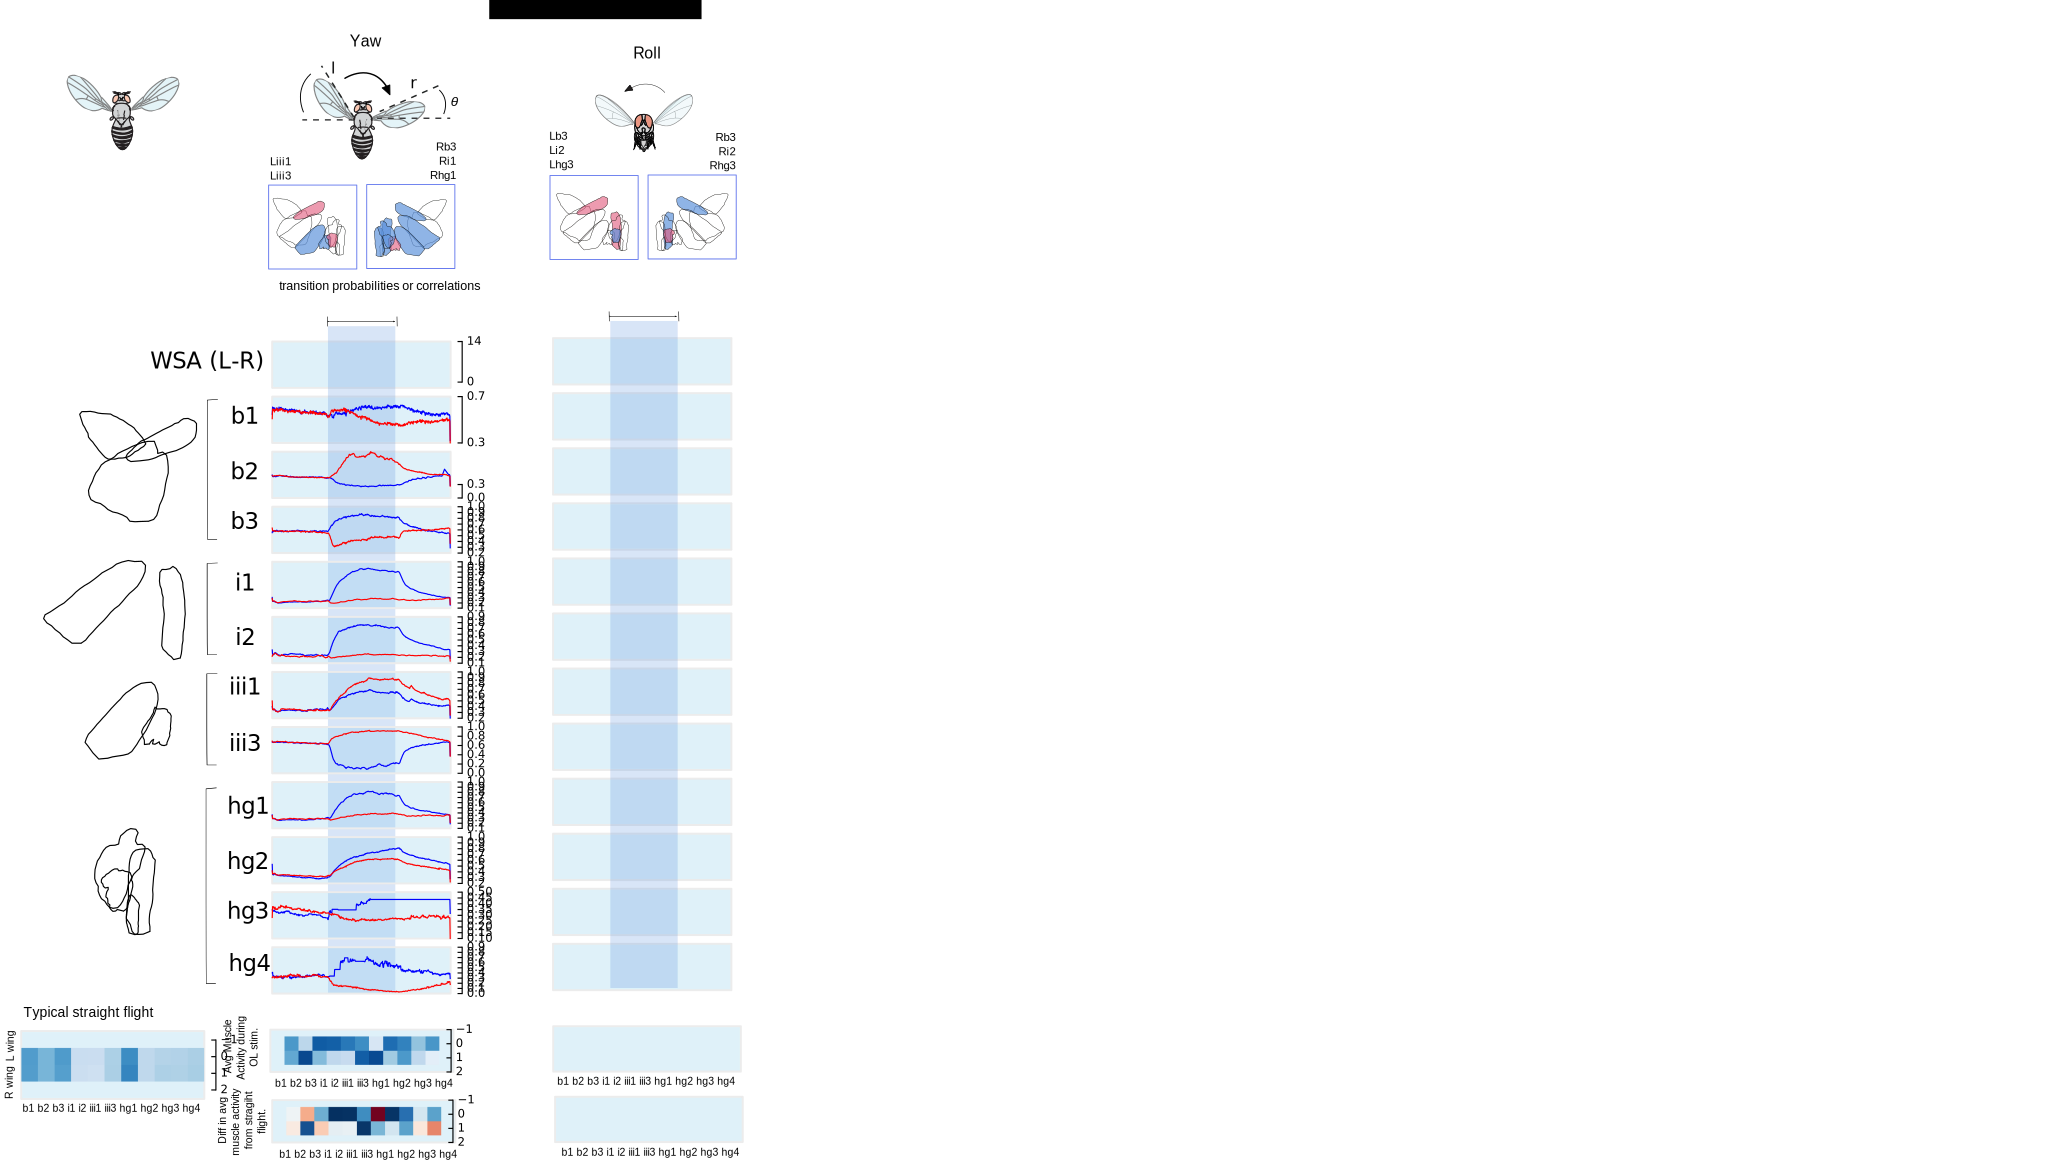

In [88]:

from matplotlib.animation import FuncAnimation

import figurefirst as fifi
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd


layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_avg_reflected.svg',make_mplfigures = True)


times = np.arange(500)*0.02
colors = times[157:357]

layout.axes['averaged_activity_reg'].matshow(grand_mean_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r'].matshow(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_yaw_l'].matshow(yl_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_up'].matshow(pu_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_down'].matshow(pd_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_cw'].matshow(rc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_roll_ccw'].matshow(rcc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r_dif'].matshow(yr_data_diff, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_yaw_l_dif'].matshow(yl_data_diff, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
#layout.axes['averaged_activity_pitch_up_dif'].matshow(pu_data_diff, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
#layout.axes['averaged_activity_pitch_down_dif'].matshow(pd_data_diff, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_roll_cw_dif'].matshow(rc_data_diff, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_roll_ccw_dif'].matshow(rcc_data_diff, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)



#layout.axes['yaw_r_lmr_lw'].plot(times,rad_to_deg(yaw_right_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lw'].set_ybound(-2,14)
layout.axes['yaw_r_lmr_lw'].set_yticks([0, 14])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_r_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['yaw_r_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_l'],clip_on = False,color = 'b')

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_r'],clip_on = False,color = 'r')





#layout.axes['roll_cw_lmr_lw'].plot(times,rad_to_deg(roll_cw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lw'].set_ybound(-2,5)
layout.axes['roll_cw_lmr_lw'].set_yticks([-2, 5])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_l'],clip_on = False,color = 'b')

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_r'],clip_on = False,color = 'r')




fifi.mpl_functions.set_spines(layout)
layout.save('avg_yaw_and_roll.svg')
plt.close('all')
display(SVG('avg_yaw_and_roll.svg'))

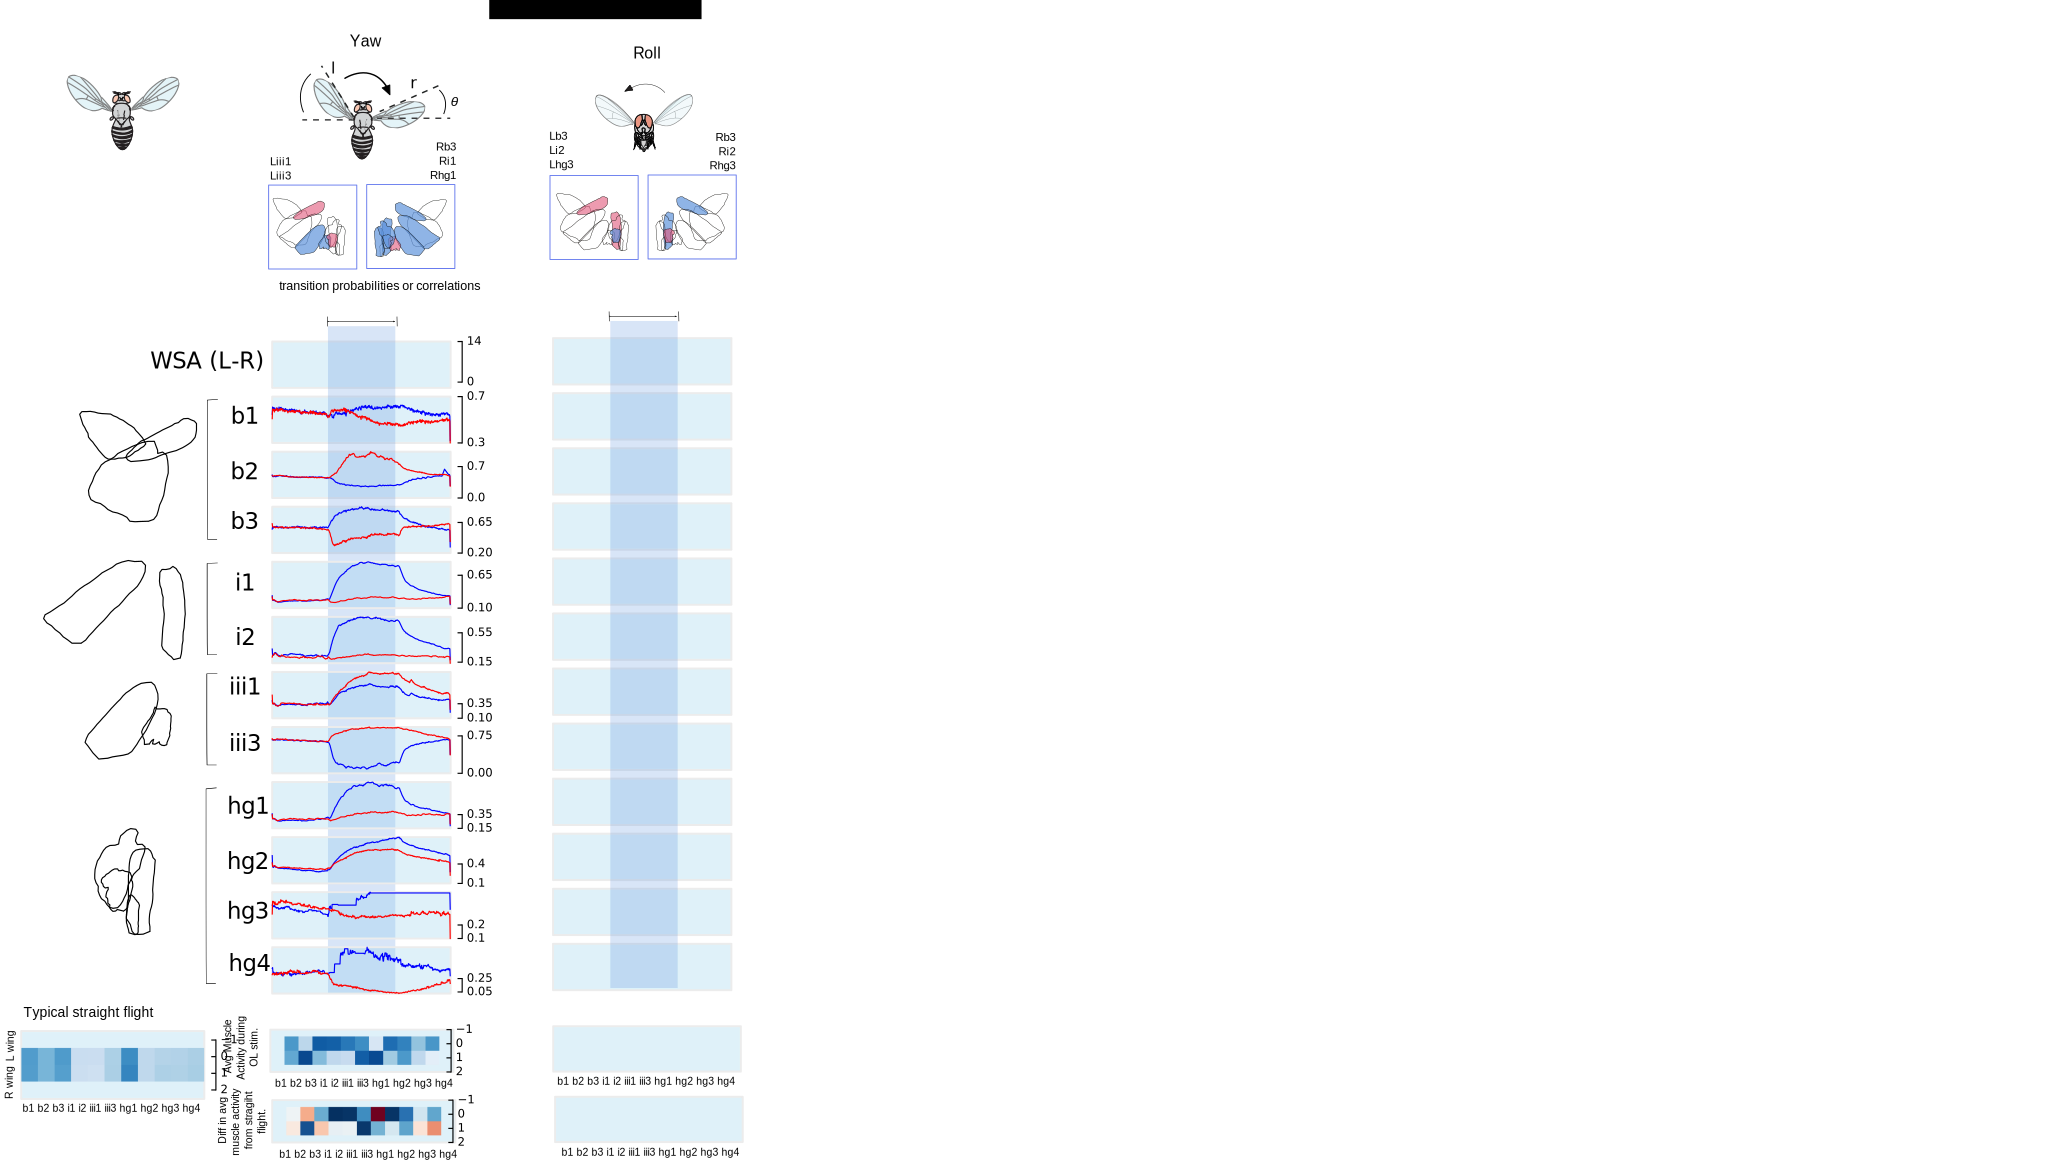

In [95]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import ndimage


#layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_10.svg',make_mplfigures = True)

layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_avg_reflected.svg',make_mplfigures = True)


times = np.arange(500)*0.02
colors = times[150:350]

layout.axes['averaged_activity_reg'].matshow(all_grand_mean_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r'].matshow(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_yaw_l'].matshow(yl_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_up'].matshow(pu_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_down'].matshow(pd_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_cw'].matshow(rc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_roll_ccw'].matshow(rcc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r_dif'].matshow(yr_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_yaw_l_dif'].matshow(yl_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
#layout.axes['averaged_activity_pitch_up_dif'].matshow(pu_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
#layout.axes['averaged_activity_pitch_down_dif'].matshow(pd_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
layout.axes['averaged_activity_roll_cw_dif'].matshow(rc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_roll_ccw_dif'].matshow(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)

'''
#layout.axes['activity_scale_bar'].plot.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['diff_scale_bar'].plot.colorbar(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
img = plt.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
img = img[:,::-1]
img[:,0] = np.array([0,0,0,0])
#rimg = ndimage.rotate(img, 90)

layout.axes['diff_scale_bar'].imshow(img,
              interpolation = 'nearest',
              #aspect = 'auto',
              extent= (0,1,0.1,1.0))
              
              
'''


#layout.axes['yaw_r_lmr_lw'].plot(times,rad_to_deg(yaw_right_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lw'].set_ybound(-2,14)
layout.axes['yaw_r_lmr_lw'].set_yticks([0, 14])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_r_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['yaw_r_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_r_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_r_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_r_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_r_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_r_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_r_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_r_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_r_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_r_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_r'],clip_on = False,color = 'r')



#layout.axes['roll_cw_lmr_lw'].plot(times,rad_to_deg(roll_cw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lw'].set_ybound(-2,5)
layout.axes['roll_cw_lmr_lw'].set_yticks([-2, 5])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_cw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['roll_cw_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_cw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_cw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_cw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_cw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_cw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_cw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_cw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_cw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_cw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_r'],clip_on = False,color = 'r')


'''
#layout.axes['roll_ccw_lmr_lw'].plot(times,rad_to_deg(roll_ccw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lw'].set_ybound(-5,2)
layout.axes['roll_ccw_lmr_lw'].set_yticks([-5, 2])


#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_ccw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['roll_ccw_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_ccw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_ccw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_ccw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_ccw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_ccw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_ccw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_ccw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_ccw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_ccw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_r'],clip_on = False,color = 'r')
'''


fifi.mpl_functions.set_spines(layout)
layout.save('yaw_roll_avg.svg')
plt.close('all')
display(SVG('yaw_roll_avg.svg'))

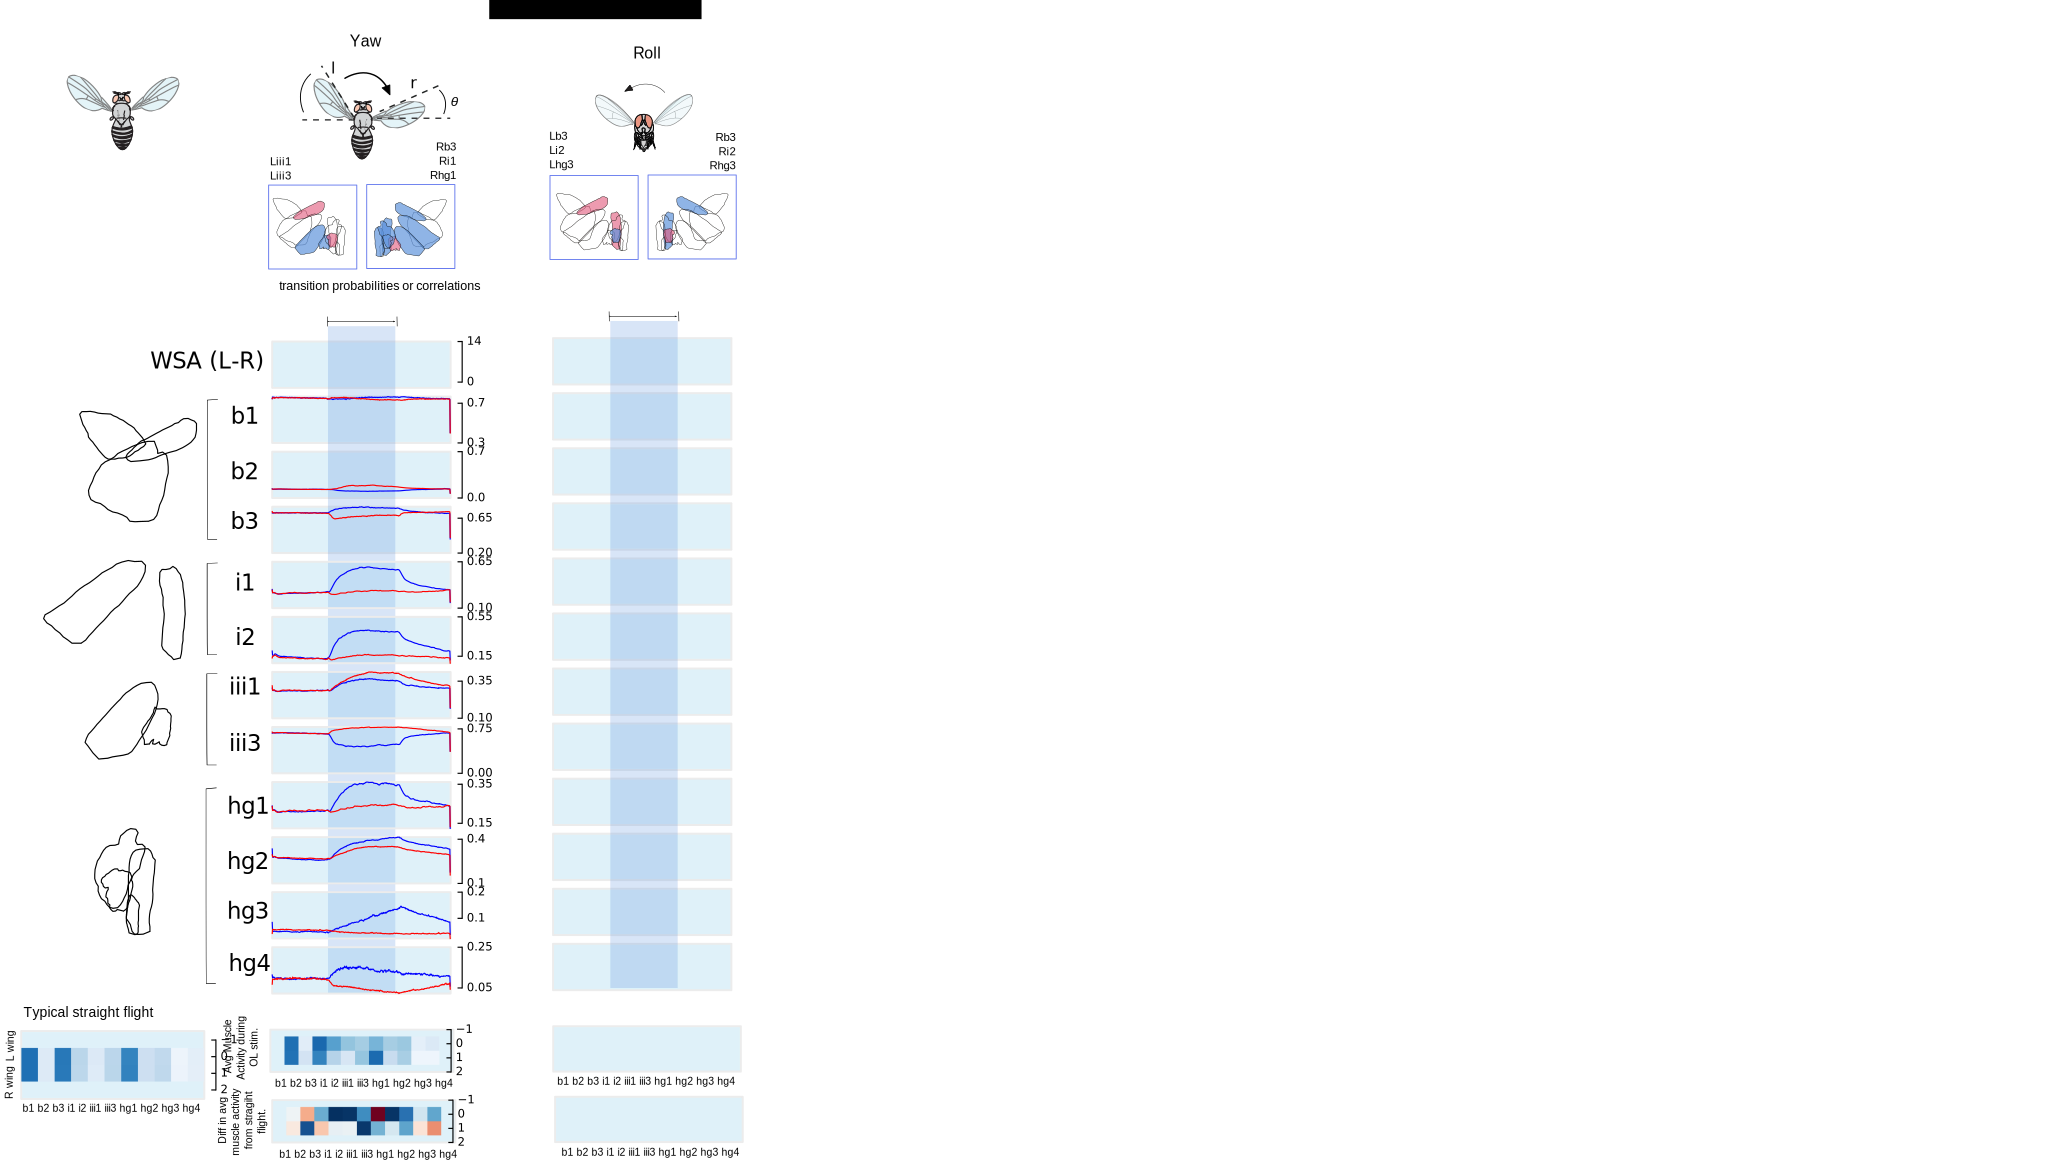

In [124]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import ndimage


#layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_10.svg',make_mplfigures = True)

layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_avg_reflected.svg',make_mplfigures = True)


times = np.arange(500)*0.02
colors = times[150:350]

layout.axes['averaged_activity_reg'].matshow(all_grand_mean_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r'].matshow(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_yaw_l'].matshow(yl_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_up'].matshow(pu_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_pitch_down'].matshow(pd_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_cw'].matshow(rc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['averaged_activity_roll_ccw'].matshow(rcc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r_dif'].matshow(yr_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_yaw_l_dif'].matshow(yl_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
#layout.axes['averaged_activity_pitch_up_dif'].matshow(pu_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
#layout.axes['averaged_activity_pitch_down_dif'].matshow(pd_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
layout.axes['averaged_activity_roll_cw_dif'].matshow(rc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.5, vmax = 0.5)
#layout.axes['averaged_activity_roll_ccw_dif'].matshow(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)

'''
#layout.axes['activity_scale_bar'].plot.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['diff_scale_bar'].plot.colorbar(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
img = plt.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
img = img[:,::-1]
img[:,0] = np.array([0,0,0,0])
#rimg = ndimage.rotate(img, 90)

layout.axes['diff_scale_bar'].imshow(img,
              interpolation = 'nearest',
              #aspect = 'auto',
              extent= (0,1,0.1,1.0))
              
              
'''


#layout.axes['yaw_r_lmr_lw'].plot(times,rad_to_deg(yaw_right_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lw'].set_ybound(-2,14)
layout.axes['yaw_r_lmr_lw'].set_yticks([0, 14])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_r_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['yaw_r_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_r_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_r_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_r_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_r_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_r_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_r_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_r_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_r_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_r_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_r'],clip_on = False,color = 'r')



#layout.axes['roll_cw_lmr_lw'].plot(times,rad_to_deg(roll_cw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lw'].set_ybound(-2,5)
layout.axes['roll_cw_lmr_lw'].set_yticks([-2, 5])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_cw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['roll_cw_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_cw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_cw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_cw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_cw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_cw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_cw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_cw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_cw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_cw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_r'],clip_on = False,color = 'r')


'''
#layout.axes['roll_ccw_lmr_lw'].plot(times,rad_to_deg(roll_ccw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lw'].set_ybound(-5,2)
layout.axes['roll_ccw_lmr_lw'].set_yticks([-5, 2])


#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_ccw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb2'].set_ybound(0.0,0.7)
layout.axes['roll_ccw_lmr_lb2'].set_yticks([0.0,0.7])
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_ccw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_ccw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_ccw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_ccw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_ccw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_ccw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_ccw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_ccw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_ccw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_r'],clip_on = False,color = 'r')
'''


fifi.mpl_functions.set_spines(layout)
layout.save('yaw_roll_avg.svg')
plt.close('all')
display(SVG('yaw_roll_avg.svg'))